In [1]:
import warnings

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import t, f
from ISLP import load_data
from ISLP.models import summarize, poly, ModelSpec as MS
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

np.random.seed(0)
warnings.filterwarnings('ignore')

%matplotlib inline

### Notebook contains a solutions from a book "Introduction To Statistical Learning" in Python edition written by Daniela Witten, Robert Tibshirani, Gareth James, Trevor Hastie and Jonathan Taylor.

# Table of Contents

* [Exercise 3.8 (a)](#Exercise-3.8-a)
* [Exercise 3.8 (b)](#Exercise-3.8-b)
* [Exercise 3.8 (c)](#Exercise-3.8-c)
* [Exercise 3.9 (a)](#Exercise-3.9-a)
* [Exercise 3.9 (b)](#Exercise-3.9-b)
* [Exercise 3.9 (c)](#Exercise-3.9-c)
* [Exercise 3.9 (d)](#Exercise-3.9-d)
* [Exercise 3.9 (e)](#Exercise-3.9-e)
* [Exercise 3.9 (f)](#Exercise-3.9-f)
* [Exercise 3.10 (a)](#Exercise-3.10-a)
* [Exercise 3.10 (b)](#Exercise-3.10-b)
* [Exercise 3.10 (c)](#Exercise-3.10-c)
* [Exercise 3.10 (d)](#Exercise-3.10-d)
* [Exercise 3.10 (e)](#Exercise-3.10-e)
* [Exercise 3.10 (f)](#Exercise-3.10-f)
* [Exercise 3.10 (g)](#Exercise-3.10-g)
* [Exercise 3.10 (h)](#Exercise-3.10-h)
* [Exercise 3.11 (a)](#Exercise-3.11-a)
* [Exercise 3.11 (b)](#Exercise-3.11-b)
* [Exercise 3.11 (c)](#Exercise-3.11-c)
* [Exercise 3.11 (d)](#Exercise-3.11-d)
* [Exercise 3.11 (e)](#Exercise-3.11-e)
* [Exercise 3.11 (f)](#Exercise-3.11-f)
* [Exercise 3.12 (a)](#Exercise-3.12-a)
* [Exercise 3.12 (b)](#Exercise-3.12-b)
* [Exercise 3.12 (c)](#Exercise-3.12-c)
* [Exercise 3.13 (a)](#Exercise-3.13-a)
* [Exercise 3.13 (b)](#Exercise-3.13-b)
* [Exercise 3.13 (c)](#Exercise-3.13-c)
* [Exercise 3.13 (d)](#Exercise-3.13-d)
* [Exercise 3.13 (e)](#Exercise-3.13-e)
* [Exercise 3.13 (f)](#Exercise-3.13-f)
* [Exercise 3.13 (g)](#Exercise-3.13-g)
* [Exercise 3.13 (h)](#Exercise-3.13-h)
* [Exercise 3.13 (i)](#Exercise-3.13-i)
* [Exercise 3.13 (j)](#Exercise-3.13-j)
* [Exercise 3.14 (a)](#Exercise-3.14-a)
* [Exercise 3.14 (b)](#Exercise-3.14-b)
* [Exercise 3.14 (c)](#Exercise-3.14-c)
* [Exercise 3.14 (d)](#Exercise-3.14-d)
* [Exercise 3.14 (e)](#Exercise-3.14-e)
* [Exercise 3.14 (f)](#Exercise-3.14-f)
* [Exercise 3.14 (g)](#Exercise-3.14-g)
* [Exercise 3.15 (a)](#Exercise-3.15-a)
* [Exercise 3.15 (b)](#Exercise-3.15-b)
* [Exercise 3.15 (c)](#Exercise-3.15-c)
* [Exercise 3.15 (d)](#Exercise-3.15-d)

In [2]:
df = pd.read_csv('../datasets/Auto.csv', na_values='?')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# Exercise 3.8 a

Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output.

### i. Is there a relationship between the predictor and the response?

**Answer**:

Given `summarize` results and value of $\text{t-statistics}$ in absolute value of `horsepower` coefficient and corresponding $p$-value, there is a strong evidence to reject $H_0$ in favor of $H_a$, i.e. there is a relationship between predictor and dependent variable.

In [6]:
model = sm.OLS.from_formula('mpg ~ horsepower', data=df).fit()

summarize(model)

,coef,std err,t,P>|t|
Intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### ii. How strong is the relationship between the predictor and the response?

**Answer**:

We could calculate the $R^{2}$ metric proportion measure, which stands for an amount of explained variability in the response $Y$ using the predictor $X$.

Another way to measure the strength of a relationship would be $\text{RSE}$ (*Residual Standard Error*) which stands for an average deviation of response variable $Y$ from population regression line. In other words, if the $\text{RSE}$ is small, then $\hat{y} \approx y$ is small and that implies that the relationship is strong.

In 60\% predictor `horsepower` explains the variability in the response `mpg` which is a strong enough relationship. We also see that $\text{RSE} \approx 4.9$ which on average the our prediction of `mpg` will deviate from a population regression line by this value which is not big difference (21\%) error. 

In [7]:
RSS = np.sum(np.square(model.resid))
RSS

9385.915871932419

In [8]:
RSE = np.sqrt(RSS / (len(df) - 2))
RSE

4.90575691954594

In [9]:
TSS = np.sum(np.square(df.loc[:, 'mpg'] - df.loc[:, 'mpg'].mean()))
TSS

23818.99346938776

In [10]:
R_squared = 1 - (RSS / TSS)
R_squared

0.6059482578894348

In [11]:
RSE / df.loc[:, 'mpg'].mean() * 100

20.923714066914833

### iii. Is the relationship between the predictor and the response positive or negative?

**Answer**: We definitely see negative relationship between `mpg` and `horsepower`. 

`MPG` values decrease whereas `horsepower` values increase. We see also the non-linear relationship among those data points.

We can also conclude that relationship is negative due to the sign of $\beta_1$ which is negative.

In [12]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

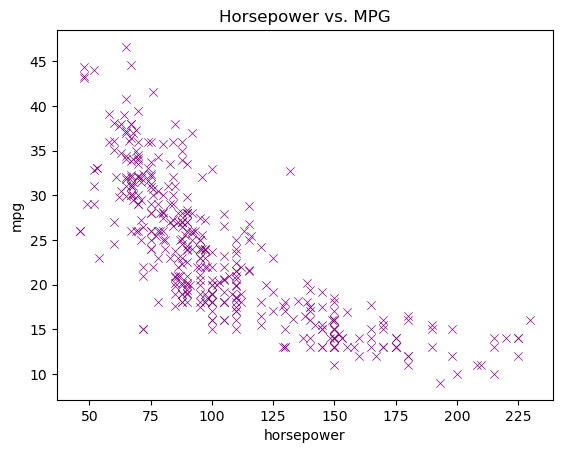

In [13]:
plt.title('Horsepower vs. MPG')
sns.scatterplot(data=df, x='horsepower', y='mpg', marker='x', color='purple')
plt.plot();

### iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95\% confidence and prediction intervals?

**Answer**:

$$
\hat{y} = \beta_0 + \beta_1x_0 
$$

$$
24.4670 = 39.9358 + (-0.1578 \cdot 98)
$$

Confidence interval of a mean response: with 95\% probability the value of mean response will fall between $\left[23.97, 24.96\right]$.

Prediction interval of a future single response variable with $X = 98$ will fall with 95\% probability between $\left[14.81, 34.12\right]$, which as expeceted is wider, because it also captures an irreducible error.

In [14]:
X_test = pd.DataFrame({'horsepower': [98]})
y_hat = model.get_prediction(X_test)

print(f'Prediction: {y_hat.predicted}')

Prediction: [24.46707715]


In [15]:
y_hat.conf_int(alpha=0.05) # 95% confidence interval

array([[23.97307896, 24.96107534]])

In [16]:
y_hat.conf_int(alpha=0.05, obs=True) # 95% prediction interval

array([[14.80939607, 34.12475823]])

### Exercise 3.8 b

Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

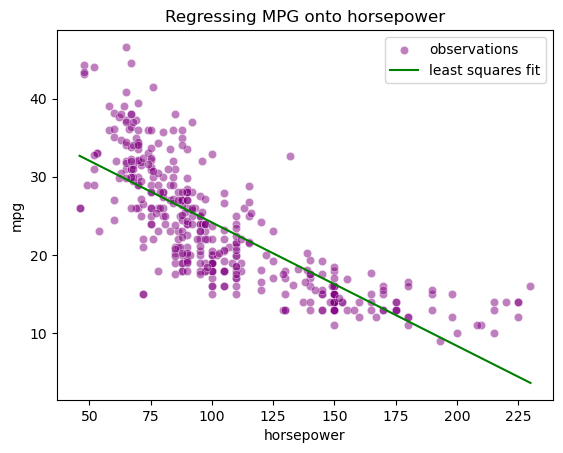

In [17]:
X_design = sm.add_constant(df['horsepower'])
y = df['mpg']
model1 = sm.OLS(y, X_design).fit()

df['predictions'] = model.predict(X_design)

plt.title('Regressing MPG onto horsepower')
sns.scatterplot(data=df, x='horsepower', y='mpg', marker='o', color='purple', label='observations', alpha=.5)

sns.lineplot(data=df, x='horsepower', y='predictions', color='green', label='least squares fit')

plt.legend()
plt.show();

### Exercsie 3.8 c

Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

**Answer**:

On the residual plot at left side panel, we can see non-linearity of the residuals. There is a strong pattern among the residuals which indicates such non-linearity — the linear fit is unsufficient to capture this relationship.

On the right-hand plot we see studentized residual plot, which we've discovered an `outliers`:
residuals of index `320` and `327` have an unusual values for $Y$.

We also can see that heteroscedasticity (non-constant variance in error terms) by funnel shape across the residuals. Which also Breusch—Pagan test confirmed. Potenital fix is to apply transformation of the resposne variable like: $\sqrt{Y}, \log{Y}$

On the leverage plot, we can see some unusual values for perdictors too, the leverage point equals to $0.005$ and some predictors $x_i$ are above that threshold.

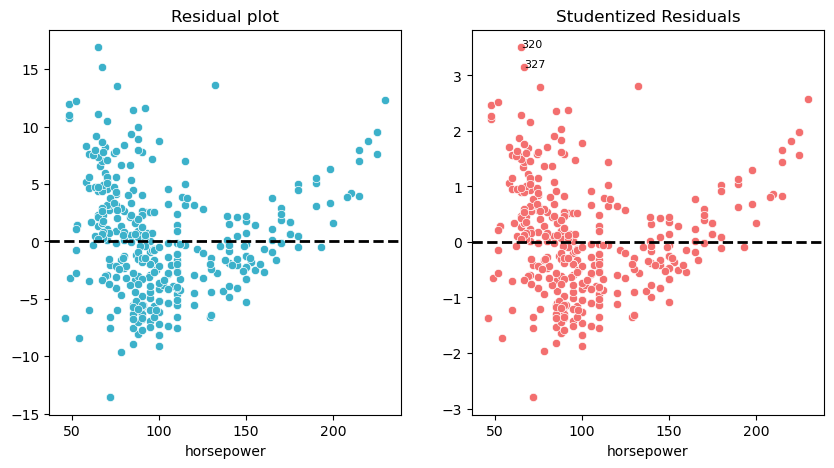

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(x=df.loc[:, 'horsepower'], y=model1.resid, marker='o', color='#3cb1ca', ax=ax[0])
ax[0].set_title('Residual plot')
ax[0].axhline(y=0, color='black', linestyle='--', lw=2,)

influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external
sns.scatterplot(x=df.loc[:, 'horsepower'], y=studentized_residuals, marker='o', color='#f36f6f', ax=ax[1])
ax[1].axhline(y=0, color='black', linestyle='--', lw=2, )
ax[1].set_title('Studentized Residuals')

for i in range(len(studentized_residuals)):
    if -3 >= studentized_residuals.iloc[i] or studentized_residuals.iloc[i] >= 3:
        ax[1].annotate(i, (df.iloc[i, 3], studentized_residuals.iloc[i]), fontsize=8)

plt.show();

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

test_stat, p_value, f_value, f_p_value = het_breuschpagan(model.resid, model.model.exog)
if p_value < 0.05:
    print('Signs of heteroscedasticity are present, p-value:', p_value)
else:
    print('No signs of heteroscedasticity, p-value:', p_value)


Signs of heteroscedasticity are present, p-value: 0.003090136011371003


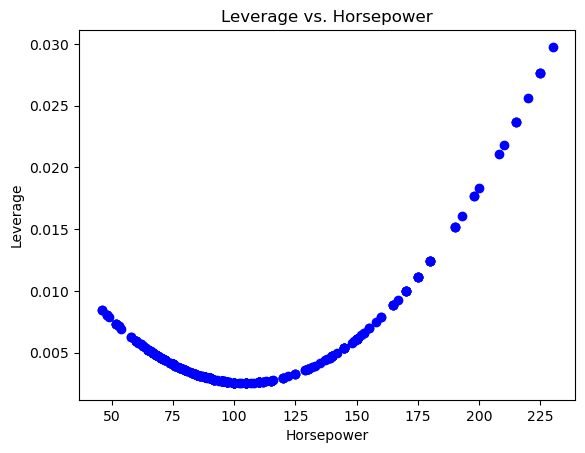

In [20]:
leverage = influence.hat_matrix_diag
df['leverage'] = leverage

plt.scatter(df['horsepower'], leverage, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Leverage')
plt.title('Leverage vs. Horsepower')
plt.show();

In [21]:
2 / len(df)

0.00510204081632653

### Exercise 3.9 a

Produce a scatterplot matrix which includes all of the variables in the data set.

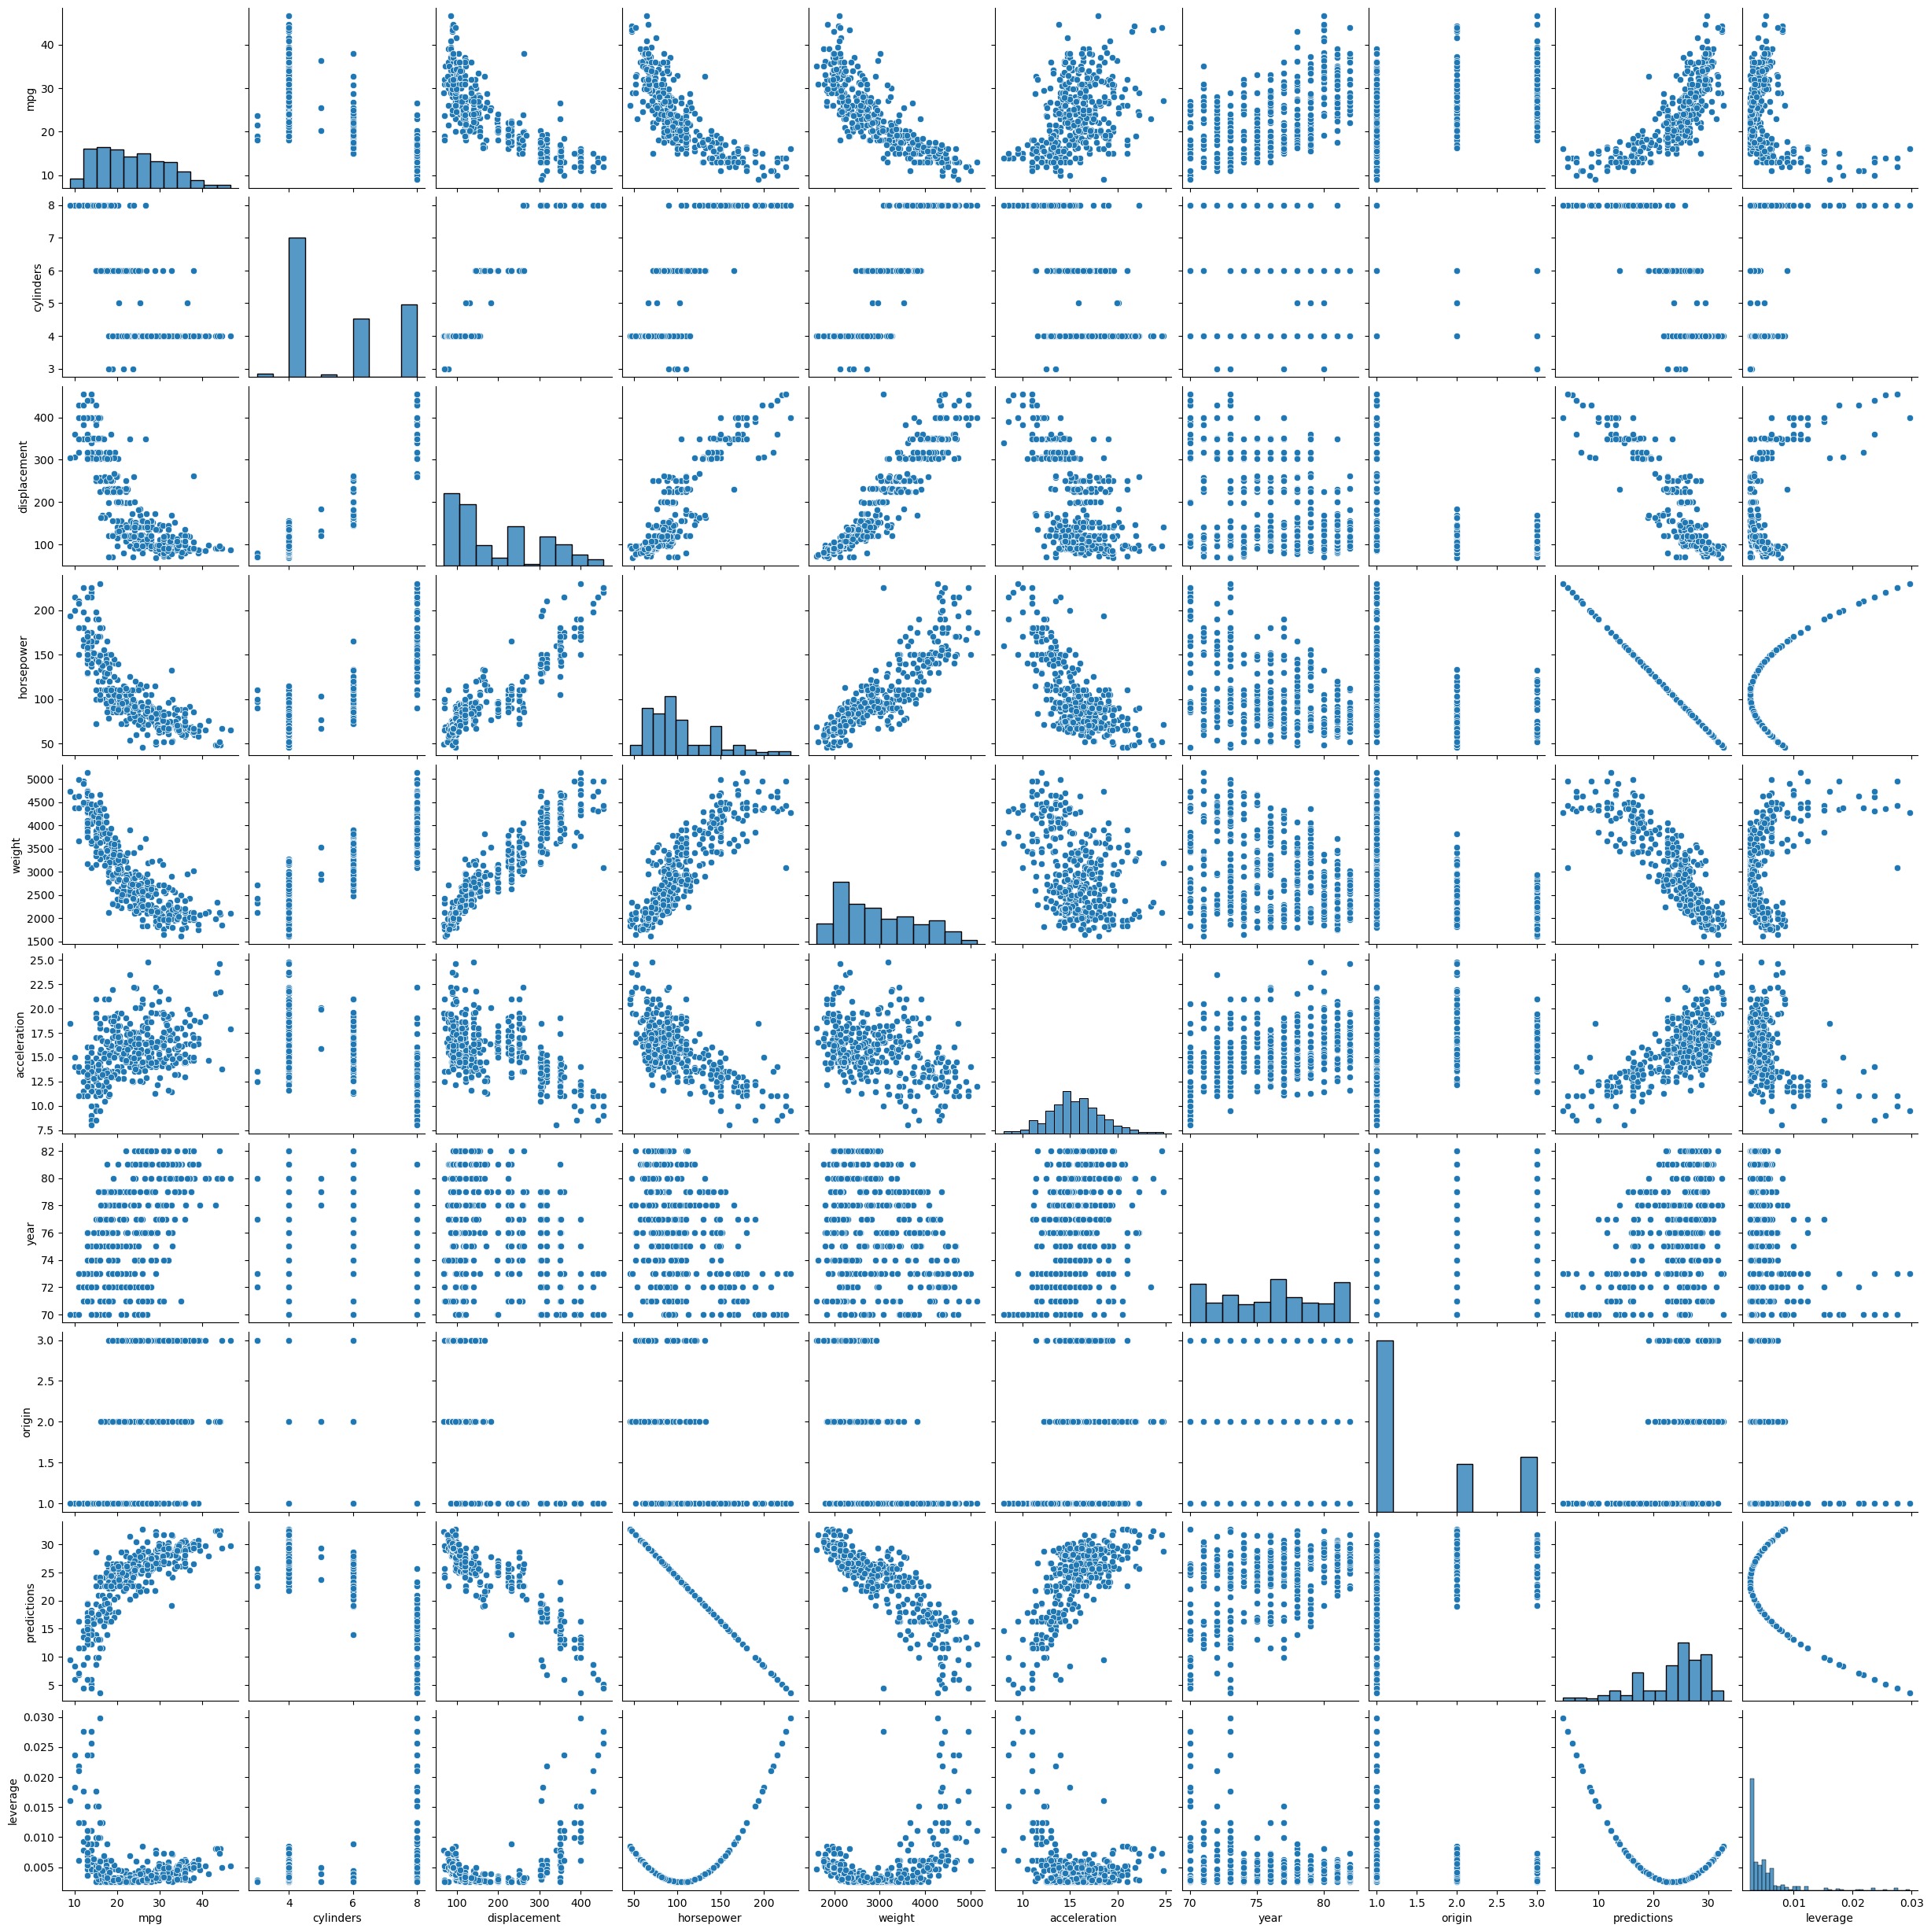

In [22]:
sns.pairplot(df);

### Exercise 3.9 b

Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [23]:
corr = df.corr(numeric_only=True)

corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,predictions,leverage
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.778427,-0.301754
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.842983,0.439082
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.897257,0.540771
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-1.000000,0.662534
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.864538,0.435057
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.689196,-0.382647
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.416361,-0.311650
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.455171,-0.160735
predictions,0.778427,-0.842983,-0.897257,-1.000000,-0.864538,0.689196,0.416361,0.455171,1.000000,-0.662534
leverage,-0.301754,0.439082,0.540771,0.662534,0.435057,-0.382647,-0.311650,-0.160735,-0.662534,1.000000


### Exercise 3.9 c

Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. 


Findings about a fit of our model:

* `cylinders` are no associated with a dependent variable `mpg`. The $p$-value is high and also $t$-value with a corresponding standard error indicates there is no relationship between those data,
* `horsepower` – large $p$-value indicates a strong evidence that there is no relationship between dependent variable $Y$ and predictor `horsepower`,
* `acceleration` — another predictor with large corresponding $p$-value – indicates a strong evidence to reject $H_a$ — there is no relationship between predictor and dependent variable.

In [24]:
model2 = sm.OLS.from_formula('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df).fit()
summarize(model2)

,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


### i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.

**Answer**:

Let's perform ANOVA test, which will tell us that at least one predictors has a significance on a dependent variable $Y$:
- $H_0: \text{All the coefficients are equal to zero, meaning no predictor has an effect on the dependent variable}$,
- $H_1: \text{At least one coefficient is not equal to zero, meaning that at least one predictor has an effect on the dependent variable}$

Given an outcome of our `ANOVA` test:
* `cylinders` variable with corresponding $p$-value of $0.128$ indicates a strong evidence of $H_0$ — there is no significance between those predictor and dependent variable $Y$,
* `horsepower` another predictor variable which $p$-value is large, $0.219$ indicates strong evidence that this predictor does not have a significance on the response variable $Y$,
* `acceleration` with $p$-value $0.415$ suggests that there is no relationship between `acceleration` and `mpg`,
* other variables have a significance on the `mpg` predictors given their corresponding very small $p$-values.

So, yes there is a relationship between the subset of predictors and dependent variable.

In [25]:
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
cylinders,25.791491,1.0,2.329125,1.277965e-01
displacement,77.612668,1.0,7.008884,8.444649e-03
horsepower,16.739754,1.0,1.511699,2.196328e-01
weight,1091.631693,1.0,98.580813,7.874953e-21
acceleration,7.358417,1.0,0.664509,4.154780e-01
year,2402.249906,1.0,216.937408,3.055983e-39
origin,291.134494,1.0,26.291171,4.665681e-07
Residual,4252.212530,384.0,NaN,NaN


### ii. Which predictors appear to have a statistically significant relationship to the response?

**Answer**:

Given the results of `sum_sq` from `anova_lm` table we can conclude that:

* `weight` is a statistically significant to the response variable $Y$,
* `year`, `origin` seems to be a statistically significant predictor to the response variable $Y$,
* rest of the predictors based on their $p$-values and also $\text{F-value}$ indicate that there are not significant to the response variable $Y$.

### iii. What does the coefficient for the year variable suggest?

**Answer**:

Coefficient of the `year` suggests that `mpg` will increase by  $0.75$ on average with a increase in one-unit in `year` given that other predictors remain fixed.

In [26]:
model2.params.year

0.7507726779503121

### Exercise 3.9 d

Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**Answer**:

* Residuals plot suggests strong non-linearity among the resiudals indicating that a linear fit may be unsufficient to estimate a true relationship $f(X)$. We also see the *funnel-shape* which is an evidence of *heteroscedasticity* which suggests non-constant variance among the error terms.
* The `QQ Plot` (*Quantile-Quantile plot*) suggests non-linearity among the dataset, because we see systematic deviations from an identity line (one time is upward away and one is downward to an identity line). Deviations from the ends of a line suggests that the distribution of the data has a heavier tails than in a normal distribution (i.e. leptokurtic distribution). Possible solution would be a creation of a polynomial regression or applying non-linear transformations on predictors.
* Scale-Location plot is used to check the assumption of homoscedasticity (equal variances) in the residuals; if the residuals have a constant variance, then we would see no-pattern (the observations would be spreaded across the plot), but in this case there is a strong evidence of Heteroscedasticity, we can see a pattern across data points, possible solutions are applying some transformations on dependent variable $Y$ such as: $\sqrt{Y}, \log{Y}$.
* We also see some `outliers` – an unusual values of a response variable $Y$ given $X$. Possible solution would be just a removal of such observations.

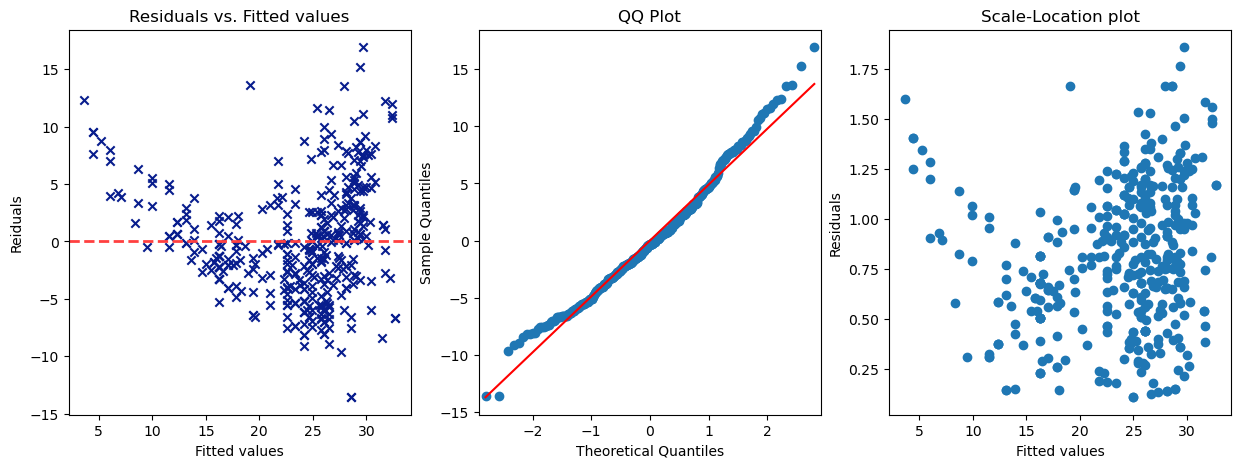

In [27]:
residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

fig, axes = plt.subplots(1,3, figsize=(15, 5))
axes[0].set_title('Residuals vs. Fitted values')
axes[0].scatter(fitted_values, residuals, marker='x', color='#081D8D')
axes[0].axhline(y=0, color='#FF4040', lw=2, linestyle='--')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel('Reiduals')

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot')

axes[-1].set_title('Scale-Location plot')
axes[-1].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)))
axes[-1].set_xlabel('Fitted values')
axes[-1].set_ylabel('Residuals')

plt.show();

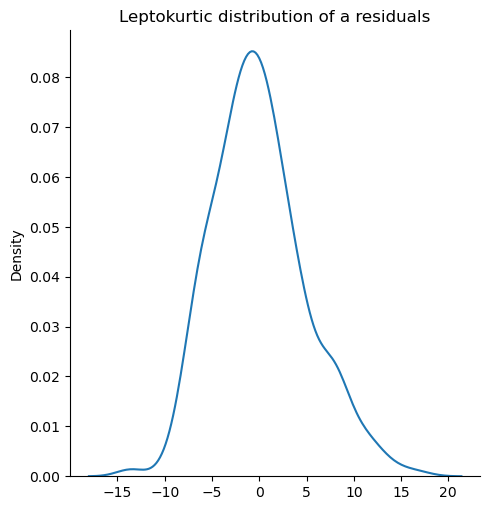

In [28]:
sns.displot(residuals, kind='kde', );
plt.title('Leptokurtic distribution of a residuals');

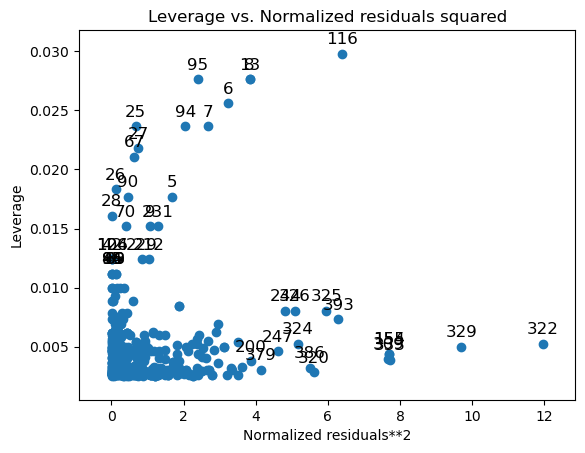

In [29]:
plot_leverage_resid2(model)
plt.show();

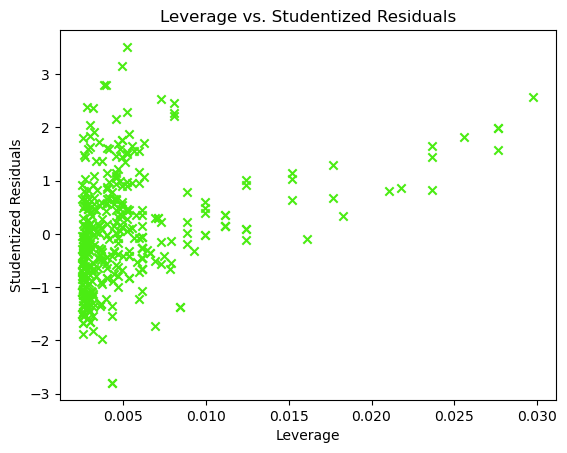

In [30]:
influence_summary = model.get_influence().summary_frame()
p = 7
n = len(df)

plt.scatter(influence_summary['hat_diag'], influence_summary['student_resid'], color='#4BEC13', marker='x')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Leverage vs. Studentized Residuals')
plt.show()

outliers = influence_summary[np.abs(influence_summary['student_resid']) > 2]
high_leverage_points = influence_summary[influence_summary['hat_diag'] > (2 * p / n)]

In [31]:
outliers

,dfb_Intercept,dfb_horsepower,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
116,-0.359459,0.431666,0.100451,2.559572,0.029753,0.448220,2.578033,0.451453
154,-0.161093,0.119564,0.016872,-2.772416,0.004371,-0.183695,-2.796554,-0.185294
155,-0.161093,0.119564,0.016872,-2.772416,0.004371,-0.183695,-2.796554,-0.185294
244,0.193135,-0.164571,0.019622,2.198277,0.008056,0.198102,2.209186,0.199085
247,0.129661,-0.097959,0.010666,2.147996,0.004602,0.146053,2.158044,0.146736
309,0.147088,-0.104705,0.015211,2.769644,0.003950,0.174418,2.793702,0.175933
320,0.078186,-0.039032,0.007907,2.365022,0.002819,0.125756,2.379110,0.126505
322,0.232568,-0.182431,0.031512,3.458909,0.005240,0.251047,3.508709,0.254661
324,0.151510,-0.118847,0.013614,2.273514,0.005240,0.165011,2.285795,0.165902
325,0.215032,-0.183229,0.024252,2.443878,0.008056,0.220235,2.459650,0.221656


### Exercise 3.9 e

Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

* `horsepower` with `acceleration` seem to be a significant interaction term,
* `weight` with `cylinders` seem to be a significant interaction term,
* adding an interactions seems that we increase multicollinearity between predictors,
* `horsepower` with `cylinders` seem to be a significant interaction term,
* `weight` and `acceleration` seem to be a significant interaction term.

In [32]:
int_model = sm.OLS.from_formula('mpg ~ horsepower * acceleration + year + origin + weight * cylinders', data=df).fit()

int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.9
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          1.07e-160
Time:                        17:18:14   Log-Likelihood:                -970.31
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1994.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.5742      5.330     -1.234      0.218     -17.053       3.905
horsepower                  0.0723      0.020      3.659      0.000       0.033       0.111
acceleration                0.7541      0.142      5.324      0.000       0.476       1.033
horsepower:acceleration    -0.0088      0.001     -5.990      0.000      -0.012      -0.006
year                        0.7830      0.045     17.547      0.000       0.695       0.871
origin                      0.6418      0.239      2.691      0.007       0.173       1.111
weight                     -0.0123      0.001    -10.879      0.000      -0.015      -0.010
cylinders                  -4.1630      0.543     -7.669      0.000      -5.230      -3.096
weight:cylinders            0.0013      0.000      8.095      0.000       0.001       0.002
==============================================================================
Omnibus:                       30.700   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.873
Skew:                           0.402   Prob(JB):                     6.72e-16
Kurtosis:                       4.906   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
int_anova = sm.stats.anova_lm(model1, model2, int_model)

int_anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,101.081623,6.878983e-76
2,383.0,3241.948306,1.0,1010.264225,119.351440,2.281389e-24


In [34]:
single_int_anova = sm.stats.anova_lm(int_model)
single_int_anova

,df,sum_sq,mean_sq,F,PR(>F)
horsepower,1.0,14433.077597,14433.077597,1705.106991,4.015308e-143
acceleration,1.0,580.951446,580.951446,68.632928,2.014764e-15
horsepower:acceleration,1.0,1203.633906,1203.633906,142.195909,4.283677e-28
year,1.0,2229.230213,2229.230213,263.358663,1.906648e-45
origin,1.0,766.062184,766.062184,90.501695,2.104895e-19
weight,1.0,806.658142,806.658142,95.297654,2.994290e-20
cylinders,1.0,2.724319,2.724319,0.321848,5.708316e-01
weight:cylinders,1.0,554.707356,554.707356,65.532481,7.680662e-15
Residual,383.0,3241.948306,8.464617,NaN,NaN


In [35]:
int_model2 = sm.OLS.from_formula('mpg ~ weight * acceleration + horsepower * cylinders + year', data=df).fit()

int_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     329.2
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          5.70e-158
Time:                        17:18:14   Log-Likelihood:                -979.76
No. Observations:                 392   AIC:                             1976.
Df Residuals:                     384   BIC:                             2007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8465      8.266      0.707      0.480     -10.406      22.099
weight                  -0.0023      0.002     -1.397      0.163      -0.006       0.001
acceleration             0.2268      0.296      0.766      0.444      -0.355       0.809
weight:acceleration     -0.0001   9.83e-05     -1.374      0.170      -0.000    5.82e-05
horsepower              -0.2943      0.036     -8.239      0.000      -0.364      -0.224
cylinders               -4.1940      0.548     -7.651      0.000      -5.272      -3.116
horsepower:cylinders     0.0372      0.005      7.758      0.000       0.028       0.047
year                     0.7548      0.046     16.426      0.000       0.664       0.845
==============================================================================
Omnibus:                       43.114   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.545
Skew:                           0.656   Prob(JB):                     1.45e-17
Kurtosis:                       4.739   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 3.9 f

Try a few different transformations of the variables, such as $\log{(X)}$, $\sqrt{X}$, $X^{2}$. Comment on your findings.

**Answer**:

* performing $\log{(X)}$ on a `weight` and using $\sqrt{X}$ on `year` eliminated a strong pattern of non-linearity in a residual plot as we see below. Data poinst now are more dispersed, indicating that fit is sufficient to capture this relationship,
* the model with three variables and non-linear transformations explains in 84\% the variability in the response $Y$ by using $X$,
* We could also eliminate an outliers as well as high-leverage points,
* *Residuals plot* suggests that there is a sign of heteroscedasticity among the error terms (residuals). Funnel shape of residuals is a sign of non-constant variance. Performed tests with very small $p$-values indicates a strong evidence of present non-constant variance.


In [36]:
X_weight = np.log(df.loc[:, 'weight'].to_numpy())
X_year = np.sqrt(df.loc[:, 'year'].to_numpy())
X_origin = np.square(df.loc[:, 'origin'].to_numpy())
X = np.concatenate((X_weight.reshape(-1, 1), X_year.reshape(-1, 1), X_origin.reshape(-1, 1)), axis=1)

X_design = sm.add_constant(X)


model = sm.OLS(y, X_design).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     676.6
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          1.01e-153
Time:                        17:18:14   Log-Likelihood:                -1002.6
No. Observations:                 392   AIC:                             2013.
Df Residuals:                     388   BIC:                             2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8070      9.866      6.062      0.000      40.409      79.205
x1           -19.4127      0.715    -27.165      0.000     -20.818     -18.008
x2            13.4973      0.784     17.217      0.000      11.956      15.039
x3             0.1698      0.062      2.730      0.007       0.048       0.292
==============================================================================
Omnibus:                       56.502   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.751
Skew:                           0.731   Prob(JB):                     9.04e-30
Kurtosis:                       5.460   Cond. No.                         767.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

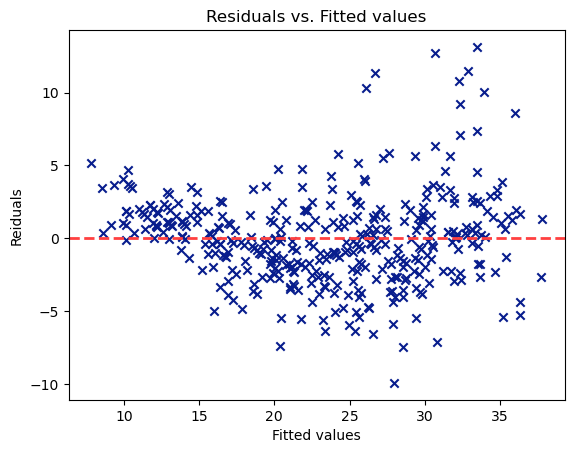

In [37]:
residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

plt.title('Residuals vs. Fitted values')
plt.scatter(fitted_values, residuals, marker='x', color='#081D8D')
plt.axhline(y=0, color='#FF4040', lw=2, linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel('Reiduals')
plt.show();

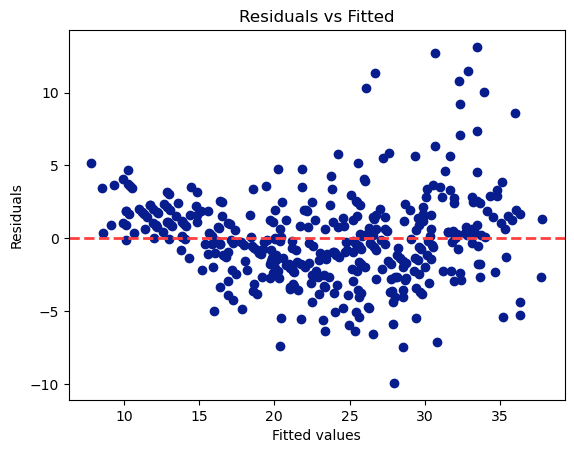

In [38]:
plt.scatter(fitted_values, residuals, marker='o', color='#081D8D')
plt.axhline(y=0, color='#FF4040', lw=2, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show();

In [39]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, model.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 23.21100218222159),
 ('p-value', 3.649308279308606e-05),
 ('f-value', 8.140037528227131),
 ('f p-value', 2.8677889341372826e-05)]

In [40]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, model.model.exog)
lzip(name, test)

[('F statistic', 2.825510191369185), ('p-value', 9.986459601633768e-13)]

### Exercise 3.10 a

Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [41]:
car_df = pd.read_csv('../datasets/Carseats.csv')

car_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [43]:
car_df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

First, we need a create a *dummy variable*, pandas has built-in method `get_dummies` for *one-hot* encoding. We will create $k - 1$ dummy variable as authors in book to omit an association with bias unit predictor from `statsmodels` library.

In [44]:
data = pd.get_dummies(car_df, columns=['Urban', 'US'], drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True
2,10.06,113,35,10,269,80,Medium,59,12,True,True
3,7.40,117,100,4,466,97,Medium,55,14,True,True
4,4.15,141,64,3,340,128,Bad,38,13,True,False


In [45]:
X = data.loc[:, data.columns[data.columns.isin(['Price', 'Urban_Yes', 'US_Yes'])]]
y = data.loc[:, 'Sales']
X_design = sm.add_constant(X)

model = sm.OLS(y, X_design.astype(float)).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        17:18:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.10 b

Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

**Answer**:

From a `summary()` method we can see that:

* $\beta_0 = 13.0435$ — meaning without any predictor (without any increase in predictor), on average model predicts $13$ units in `Sales` of child seats,
* $\beta_1 = -0.0545$ — meaning that we would get a decrease on average by $0.05454$ units in `Sales` given that other predictors are fixed,
* $\beta_2 = -0.0219$ – meaning that we would decrease of `Salse` on average by $0.0219$ given that other predictors are fixed and `Urban_Yes` are set to `True` compared to `False`, but as we see a corresponding $p$–value we might suggest that this predictor has no significance on depenent variable $Y$ hence this interpreation might be incorrect,
* $\beta_3 = 1.2006$ = meaning that we would increase of `Salse` on average by $1.2006$ given that other predictors are fixed and `US_Yes` are set to `True`.

### Exercise 3.10 c

Write out the model in equation form, being careful to handle the qualitative variables properly.

Let's define our one-hot encoded predictor `US` and `Urban`:

$$
x_{i | \text{US} } = \begin{cases} 
1 & \text{ whether the store is in the US }\\
0 & \text{ whether the store is not in the US }
\end{cases}
$$

$$
x_{i | \text{Urban} } = \begin{cases} 
1 & \text{ whether the store is in an urban location }\\
0 & \text{ whether the store is in an rural location }
\end{cases}
$$


We have a multiple linear regression model, such that:

$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_{i1} + \begin{cases}
\beta_2x_{i2} & \text{ if the ith store is in the US }\\
0 & \text{ if the ith store is not in the US } 
\end{cases} + \begin{cases}
\beta_3x_{i3} & \text{ if the ith store is in an urban location }\\
0 & \text{ if the ith store is in an rural location } 
\end{cases}
$$

Where:

* $\beta_0 = 13.0435$,
* $\beta_1 = -0.0545$,
* $\beta_2 = -0.0219$,
* $\beta_3 = 1.2006$.

### Exercise 3.10 d

For which of the predictors can you reject the null hypothesis: $H_0 : \beta_j = 0$?

**Answer**:

* $\text{t-value} = -0.081$ with a big $\text{std err} = 0.272$ indicates a strong evidence that $X_{\text{urban}}$ has no significance on `Sales`. Also $\text{p-value} = 0.936$ suggests to reject $H_a$ in favor of $H_0$.

### Exercise 3.10 e 

On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [47]:
X = data.loc[:, data.columns[data.columns.isin(['Price', 'US_Yes'])]]
y = data.loc[:, 'Sales']
X_design = sm.add_constant(X)

model2 = sm.OLS(y, X_design.astype(float)).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        17:18:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.10 f

How well do the models in [(a)](#Exercise-3.10-a) and [(e)](#Exercise-3.10-e) fit the data?

**Anwer**:

Comparing `summary()` method for two models we see, that:

* both models have a corresponding $R^{2} = 0.239$ which is a not sufficient explanation of variability in the response $Y$ based on $X$ (23.9\%),
* based on both models `RSE` we see that no bigger improvement after fitting a model with only significant predictors (improvement in an error in average deviation from a population regression line is 0.04\%),
* dispersion of residuals in both examples in residuals plot indicates linearity relationship between $X$ and $Y$,
* we see that estimation of $\beta = 1.1996$ coefficient of `US` is above the 95\% confidence interval: $\left[0.692, 1.708\right]$ which leads to poor predictions,
* based on the given adjusted $R^{2}$ and lower $\text{SE}$ in `model 2` — this model is relatively better than `model 1`. This `model 2` is "parsimonius" (parsimonious model is one that explains the data with the fewest number of predictors or parameters without losing its ability to fit the data well).

In [49]:
RSS_model1 = np.sum(np.square(model.resid))
RSS_model2 = np.sum(np.square(model2.resid))

RSE_model1 = np.sqrt(RSS_model1 / (len(df) - 3 - 1)) # formula is: sqrt(RSS / (n - p 1)) where n – # samples, p — # predictors
RSE_model2 = np.sqrt(RSS_model2 / (len(df) - 2 - 1))

print(f'RSE of model 1: {RSE_model1:.4f}, RSE of model 2: {RSE_model2:.4f}')

print(f'An error (%) of an average deviation in response variable y from population regression line: \n\t model 1: {(RSE_model1 / y.mean()) * 100:.2f}%,\n\t model 2: {(RSE_model2 / y.mean()) * 100:.2f}%.')

RSE of model 1: 2.4979, RSE of model 2: 2.4947
An error (%) of an average deviation in response variable y from population regression line: 
	 model 1: 33.32%,
	 model 2: 33.28%.


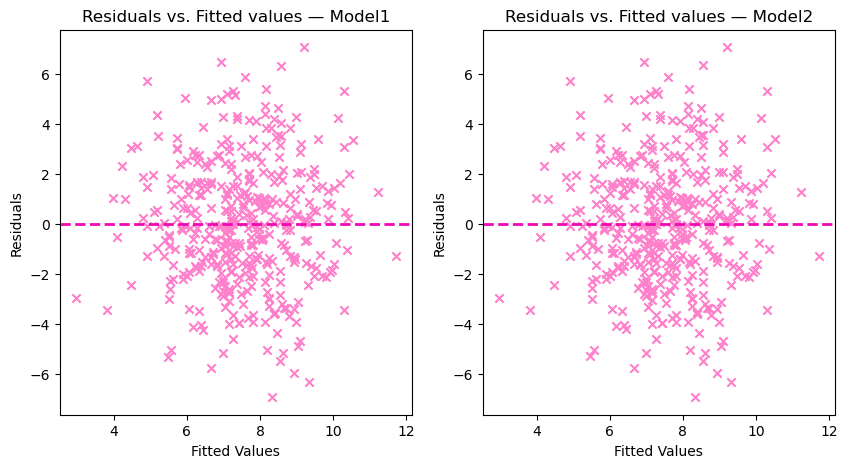

In [50]:
model1_residuals = model.resid
model1_fitted_values = model.fittedvalues

model2_residuals = model2.resid
model2_fitted_values = model2.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(model1_fitted_values, model1_residuals, marker='x', color='#FE7FCA')
axes[0].axhline(y=0, linestyle='--', color='#F008B2', lw=2)
axes[0].set_title('Residuals vs. Fitted values — Model1')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

axes[-1].scatter(model2_fitted_values, model2_residuals, marker='x', color='#FE7FCA')
axes[-1].axhline(y=0, linestyle='--', color='#F008B2', lw=2)
axes[-1].set_title('Residuals vs. Fitted values — Model2')
axes[-1].set_xlabel('Fitted Values')
axes[-1].set_ylabel('Residuals')

plt.show();

### Exercise 3.10 g 

Using the model from [(e)](#Exercise-3.10-e), obtain 95\% confidence intervals for the coefficient(s).

In [51]:
US_yes_bin = np.where(X_design.US_Yes == True, 1, 0)
X_design_tmp = X_design
X_design_tmp.US_Yes = US_yes_bin
X_design_tmp = X_design_tmp.to_numpy()

n = len(df)
p = 2
deg_fr = n - p - 1
RSS = np.sum(np.square(model.resid))
hat_resid_variance = RSS / deg_fr
inv_design_pdct = np.linalg.inv(X_design_tmp.T @ X_design_tmp) # product of inverse design matrix
SE_beta_1 = np.sqrt(hat_resid_variance * inv_design_pdct[1, 1]) # picking jj element corresponding to beta_j coeff
SE_beta_2 = np.sqrt(hat_resid_variance * inv_design_pdct[2, 2]) 

print(f'SE of beta 1: {SE_beta_1:.4f}, SE of beta 2: {SE_beta_2:.4f}')

alpha = 0.05
t_value = t.ppf(1 - alpha / 2, deg_fr)

print(f'T-value: {t_value:.4f}')

_, model2_beta_1, model2_beta_2 = tuple(model2.params)

margin_error_se_1 = t_value * SE_beta_1 # margin error for standard error of beta_1 coeff
margin_error_se_2 = t_value * SE_beta_2 

lower_bound_se1 = model2_beta_1 - margin_error_se_1 # lower bound of 95% interval for coefficient beta_1
upper_bound_se1 = model2_beta_1 + margin_error_se_1 # uppper bound of 95% interval for coefficient beta_1

lower_bound_se2 = model2_beta_2 - margin_error_se_2 
upper_bound_se2 = model2_beta_2 + margin_error_se_2 

print(f'95% conf interval for coeff beta1:\n\t[{lower_bound_se1:.4f}, {upper_bound_se1:.4f}]')
print(f'95% conf interval for coeff beta2:\n\t[{lower_bound_se2:.4f}, {upper_bound_se2:.4f}]')

SE of beta 1: 0.0053, SE of beta 2: 0.2611
T-value: 1.9661
95% conf interval for coeff beta1:
	[-0.0649, -0.0441]
95% conf interval for coeff beta2:
	[0.6863, 1.7130]


In [52]:
model2.conf_int(alpha=0.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


### Exercise 3.10 h

Is there evidence of outliers or high leverage observations in the model from [(e)](#Exercise-3.10-e)?

**Answer**:

* based on the *studentized residuals* plot we have a lot points that are *outliers*,
* based on the *leverage plots* we can also see some unusual values of predictors.

95% t–distribution interval: [-1.96595743  1.96595743]



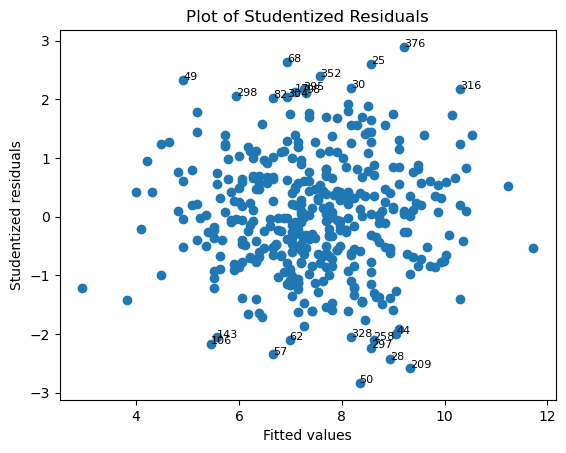

In [53]:
n, p = X.shape
alpha = 0.05
t_bounds = t.ppf([alpha / 2, 1 - alpha / 2], df=n-p-1)
print(f'95% t–distribution interval: {t_bounds}\n')

influence = model2.get_influence()
studentized_residuals = influence.resid_studentized_external

plt.scatter(model2_fitted_values, studentized_residuals)

for index, value in enumerate(studentized_residuals):
    if t_bounds[0] >= value or value >= t_bounds[-1]:
        plt.annotate(index, (model2_fitted_values[index], value), fontsize=8) 

plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.title('Plot of Studentized Residuals')
plt.show();

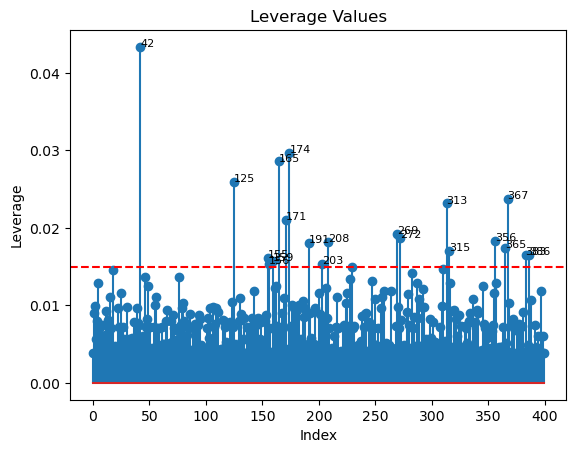

In [54]:
leverage = influence.hat_matrix_diag
n, p = X.shape
threshold = 2 * (p + 1 ) / n
high_leverage_points = np.where(leverage > threshold)[0]


plt.stem(leverage)
plt.axhline(y=threshold, color='r', linestyle='--')

for index in range(leverage.shape[0]):
    if leverage[index] >= threshold:
        plt.annotate(index, (index, leverage[index]), size=8)
        
plt.title('Leverage Values')
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.show();

In [55]:
high_leverage_points

array([ 42, 125, 155, 156, 159, 165, 171, 174, 191, 203, 208, 269, 272,
       313, 315, 356, 365, 367, 383, 386])

### Exercise 3.11 a

In this problem we will investigate the t-statistic for the null hypothesis $H_0: \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and response $y$ as follows:

```python
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
```

Perform a simple linear regression of $y$ onto $x$, without an intercept. Report the coefficient estimate $\hat{\beta}$ the standard error of this coefficient estimate, and the $\text{t-statistic}$ and $\text{p}-value$ associated with the null hypothesis $H_0: \beta = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`).

**Answer**:

Report:

* $\hat{\beta}$ (not intercept) equals to 1.9762 – this tells us that with one-unit increase in $X$, the dependent variable $y$ will increase by $1.9762$,
* standard error of $\hat{\beta}$ estimate equals to $0.117$ which informs us that how far is sufficiently $\hat{\beta}$. This value with corresponding $\text{t-value} = 16.898$ which is large compared to $\text{std err}$ give us a strong evidence to reject $H_0$ in favor of $H_a$: that there is relationship between predictor variable and depedent variable,
* $p$-value also indicates that we should reject *null hypothesis*.

In [56]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

X_np = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
X = MS(terms=[0], intercept=False).fit_transform(X_np)
simple_model = sm.OLS(y, X).fit()

summarize(simple_model)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


### Exercise 3.11 b

Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding $\text{t-statistic}$ and $p$-values associated with the null hypothesis $H_0: \beta = 0$. Comment on these results.

**Answer**:

Report:
* $\beta = 0.3757	$ (not intercept). With one-unit increase in `y` (as our predictor), we get on average increase in $X$ by $0.3757$,
* standard error is smaller – the better estimation of $\hat{\beta}$ to true value of $\beta$,
* $\text{t-value}$ is the same and is far away from 0. meaning that there is relationship between $X$ (as `y`) and dependent variable $Y$ (as `X`),
* $p$ value suggests also a strong evidence to reject $H_0$ in favor of $H_a$.


In [57]:
X = MS(terms=[1], intercept=False).fit_transform(X_np)
simple_model2 = sm.OLS(x, X).fit()

summarize(simple_model2)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [58]:
print(summarize(simple_model2))

      coef  std err       t  P>|t|
x1  0.3757    0.022  16.898    0.0


### Exercise 3.11 c

What is the relationship between the results obtained in [(a)](#Exercise-3.11-a) and [(b)](#Exercise-3.11-b)?

**Answer**:
* comparing both `summarize()` methods, we can see that $p$-value in both are very low indicating to reject $H_0$,
* $\text{t-value}$ even is the sames in both examples.

### Exercise 3.11 d

For the regression of $Y$ onto $X$ without an intercept, the $\text{t-statistic}$ for $H_0: \beta = 0$ takes the form $\hat{\beta}/\text{SE}(\hat{\beta})$, where $\hat{\beta}$ is given by:

$$
\hat{\beta} = \left( \sum_{i=1}^{n}x_iy_i \right) / \left( \sum_{i'=1}^{n}x^{2}_{i'} \right)
$$

And where:

$$
\text{SE}(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^{n}(y_i - x_i\hat{\beta})^{2}}{(n - 1) \sum_{i'=1}^{n}x^{2}_{i'}}}
$$

Show algebraically, and confirm numerically that $\text{t-statistic}$ can be written as:

$$
\frac{(\sqrt{n - 1})\sum_{i=1}^{n}x_iy_i}{\sqrt{(\sum_{i=1}^{n}x^{2}_i)(\sum_{i'=1}^{n}y^{2}_{i'}) - (\sum_{i'=1}^{n}x_{i'}y_{i'})^{2}}}
$$

**Answer**:

\begin{align*}
t &= \frac{\beta}{SE(\beta)} \\
\beta &= \frac{\sum x_i y_i}{\sum x_i^2} \\
SE(\beta) &= \sqrt{\frac{\sum(y_i - x_i \beta)^2}{(n-1) \sum x_i^2}} \\
t &= \frac{\sum x_i y_i}{\sum x_i^2} \cdot \sqrt{\frac{(n-1) \sum x_i^2}{\sum(y_i - x_i \beta)^2}} \\
&= \frac{\sqrt{n-1} \sum x_i y_i}{\sqrt{\sum x_i^2 \sum(y_i - x_i \beta)^2}} \\
&= \frac{\sqrt{n-1} \sum x_i y_i}{\sqrt{\sum x_i^2 \sum(y_i^2 - 2 \beta x_i y_i + x_i^2 \beta^2)}} \\
&= \frac{\sqrt{n-1} \sum x_i y_i}{\sqrt{\sum x_i^2 \sum y_i^2 - \sum x_i^2 \beta (2 \sum x_i y_i - \beta \sum x_i^2)}} \\
&= \frac{\sqrt{n-1} \sum x_i y_i}{\sqrt{\sum x_i^2 \sum y_i^2 - \sum x_i y_i (2 \sum x_i y_i - \sum x_i y_i)}} \\
&= \frac{\sqrt{n-1} \sum x_i y_i}{\sqrt{\sum x_i^2 \sum y_i^2 - (\sum x_i y_i)^2}}
\end{align*}

Q.E.D


In [59]:
t_statistic_app1 = np.sqrt(x.shape[0] - 1) * np.sum(x * y) / np.sqrt(np.sum(np.square(x)) * np.sum(np.square(y)) - np.square(np.sum(x * y)))

In [60]:
t_statistic_app2 = simple_model2.params[0] / simple_model2.bse[0]

In [61]:
np.isclose(t_statistic_app1, t_statistic_app2)

True

### Exercise 3.11 e

Using the results from [(d)](#Exercise-3.11-d), argue that $\text{t-statistic}$ for the regression of `y` onto `x` is the same as $\text{t-statistic}$ for the regression of `x` onto `y`.

**Answer**:

* we can for simplicity use `x` as `y` and `y` as `x` in our formula results to check whether $\text{t-statistic}$ is equal.

In [62]:
n = y.shape[0]

t_statistic_app3 = np.sqrt(n - 1) * np.sum(y * x) / np.sqrt(np.sum(np.square(y)) * np.sum(np.square(x)) - np.square(np.sum(y * x)))

In [63]:
t_statistic_app1 == t_statistic_app3

True

### Exercise 3.11 f

In `Python` show that regression is performed *with* an intercept, the $\text{t-statistic}$ for $H_0: \beta_1 = 0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

**Answer**:

* as we can see in `model_intercept`: $\text{t-statistic} = 16.734$,
* as we can see in `model_intercept2`: $\text{t-statistic} = 16.734$.

In [64]:
X = MS(terms=[0], intercept=True).fit_transform(X_np) # performing regression of y onto x with an intercept

model_intercept = sm.OLS(y, X).fit()

summarize(model_intercept)

,coef,std err,t,P>|t|
const,-0.0760,0.101,-0.756,0.451
x1,1.9686,0.118,16.734,0.000


In [65]:
X = MS(terms=[1], intercept=True).fit_transform(X_np) # performing regression of x onto y with an intercept
model_intercept2 = sm.OLS(x, X).fit()
summarize(model_intercept2)

,coef,std err,t,P>|t|
const,0.0095,0.044,0.216,0.829
x1,0.3763,0.022,16.734,0.000


### Exercise 3.12 a

This problem involves a simple linear regression without an intercept.

Recall that coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by 

$$
\hat{\beta} = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i'=1}^{n} x^{2}_{i'}}
$$

Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for regression of $Y$ and $X$.

**Answer**:

Formula for regressing of $Y$ onto $X$:

$$
\hat{\beta} = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i'=1}^{n} x^{2}_{i'}}
$$

Formula for regressing of $X$ onto $Y$:

$$
\hat{\gamma} = \frac{\sum_{i=1}^{x}y_ix_i}{\sum_{i'=1}^{n} y^{2}_{i'}}
$$

So, the numerator is equal (multiplication is commutative).

The denominator is equal, when:
* $Y = X$,
* $(x_i, y_i) = (y_i, x_i)$


### Exercise 3.12 b

Generate an example in `Python` with $n$ = 100 observations in which the coefficient estimate for the regression of `X` onto `Y` is different from the coefficient estimate for the regression of `Y` onto `X`.


In [66]:
import random

data = set()
n = 100

while len(data) < n:
    x = np.random.normal()
    y = np.random.normal()

    if (x, y) not in data and (y, x) not in data:
        data.add((x,y))

print(len(data))
x_new = np.array(list(map(lambda x: x[0], data)))
y_new = np.array(list(map(lambda y: y[-1], data)))

X_new = np.hstack((x_new, y_new)).reshape(-1, 2)

100


In [67]:
# check our dataset: regressing Y onto X
X = MS(terms=[0], intercept=False).fit_transform(X_new)
new_simple_model = sm.OLS(y_new, X).fit()

summarize(new_simple_model)

,coef,std err,t,P>|t|
x1,-0.1118,0.09,-1.249,0.215


In [68]:
# check our dataset: regressing X onto Y
X = MS(terms=[1], intercept=False).fit_transform(X_new)
new_simple_model = sm.OLS(x_new, X).fit()

summarize(new_simple_model)

,coef,std err,t,P>|t|
x1,-0.0639,0.115,-0.554,0.581


### Exercise 3.12 c

Generate an example of `Python` with $n$ = 100 observations in which the coefficient estimate for the regression of `X` onto `Y` is the same as the coefficient estimate for the regression of `Y` onto `X`.

In [69]:
import numpy as np

n = 100
data = []

for _ in range(n//2):
    x = np.random.randint(1, 200)
    y = x  
    data.append((x, y))
    data.append((y, x))

final_x_values = np.array([point[0] for point in data])
final_y_values = np.array([point[1] for point in data])
X_new = np.hstack((final_x_values, final_y_values)).reshape(-1, 2)

In [70]:
# check our dataset: regressing Y onto X
X = MS(terms=[0], intercept=False).fit_transform(X_new)
new_simple_model = sm.OLS(y_new, X).fit()

summarize(new_simple_model)

,coef,std err,t,P>|t|
x1,0.0014,0.001,1.514,0.133


In [71]:
# check our dataset: regressing X onto Y
X = MS(terms=[1], intercept=False).fit_transform(X_new)
new_simple_model1 = sm.OLS(x_new, X).fit()

summarize(new_simple_model1)

,coef,std err,t,P>|t|
x1,0.0004,0.001,0.409,0.683


### Exercise 3.13 a

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, `X`.

In [72]:
rng = np.random.default_rng(1)
np.random.seed(1)

x = rng.normal(size=(100))
x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

### Exercise 3.13 b

Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution — a normal
distribution with mean zero and variance 0.25.

In [73]:
eps = rng.normal(0, 0.25, size=(100))
eps

array([-1.62820253e-01,  2.15611199e-01, -3.13980210e-02,  1.67288310e-01,
        3.04710901e-01,  9.57323957e-02, -2.18930286e-01, -3.78579658e-01,
        4.38346029e-01, -2.78230483e-02, -1.72141237e-01,  3.60642720e-02,
       -4.78528326e-02,  2.13035566e-01,  8.48204561e-03,  3.43739590e-03,
       -1.78644930e-01,  1.17392025e-01, -2.58466681e-01,  1.66472360e-01,
        3.80984378e-01, -3.81171510e-01, -6.16557308e-01,  1.54219689e-01,
        6.36974454e-01, -2.50231212e-01, -3.12673940e-01,  1.47242233e-01,
       -2.10180398e-01, -1.26506371e-01, -8.70293667e-02,  1.33000522e-01,
       -1.01325590e-01,  6.94707100e-02, -4.41333147e-02, -2.11167776e-01,
       -7.99565644e-02, -2.37599916e-01,  1.62874647e-03, -2.80966557e-01,
       -2.73223592e-01,  3.64240454e-01, -1.32960551e-02, -1.34755064e-02,
        1.27884105e-01, -1.05214251e-01, -5.71338419e-02,  1.06287184e-01,
        7.06039606e-02, -2.89824182e-01,  2.08335649e-01, -1.47608736e-01,
       -2.64019738e-01, -

### Exercise 3.13 c

Using `x` and `eps`, generate a vector `y` according to the model

$$
Y = -1 + 0.5X + \epsilon
$$

What is the length of vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

* `y` length is 100,
* $\beta_0 = -1$ (y-intercept)
* $\beta_1 = 0.5$ (slope)

In [74]:
y = -1 + 0.5 * x + eps

In [75]:
y

array([-0.99002816, -0.37357973, -0.86617948, -1.48429031, -0.24261117,
       -0.68108032, -1.4874069 , -1.08802061, -0.37936777, -0.8807568 ,
       -1.15793012, -0.69057923, -1.41607988, -0.86841941, -1.23257761,
       -0.6971395 , -1.15878388, -1.02883635, -1.64942091, -0.96212376,
       -0.61494453, -1.51897296, -0.9695254 , -0.34241815, -1.71860679,
       -2.19473784, -1.40005999, -1.06385297, -1.1033589 , -1.01784541,
       -0.02810999, -1.42300986, -1.29012809,  0.09085651, -0.72078182,
       -0.87963609, -1.33695975, -2.0616375 , -0.91463888, -1.22645951,
       -1.88689962, -0.97737288, -1.04931789, -1.48585132, -0.92125088,
       -1.05747274, -1.03934072, -1.14685865, -0.632522  , -0.8442407 ,
       -0.6312402 , -1.55672385, -0.8981936 , -1.47583878, -0.65805603,
       -1.12906864, -0.83665037, -0.97001275, -2.15883053, -1.15734147,
       -0.74805726, -0.92277016, -1.64843279, -1.49580876, -0.7251698 ,
       -1.06746042, -0.38912873, -0.56794837, -1.97249621, -0.90

### Exercise 3.13 d

Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

We see a positive relationship between `X` and `Y` meanign higher values of `X` are associated with higher values of `Y` respectively.

We see also, that linear fit might be sufficient to capture this relationship between `X` and `Y`.

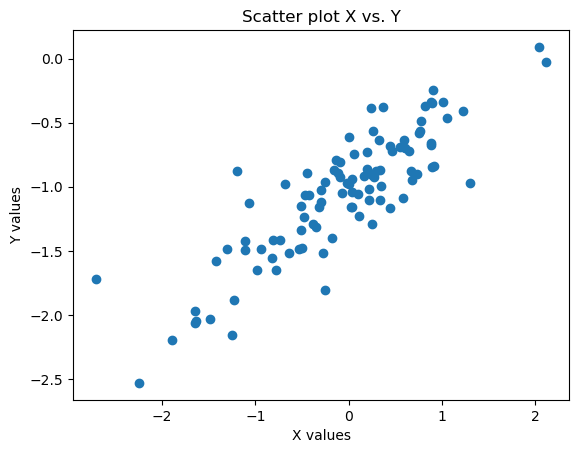

In [76]:
plt.scatter(x, y);
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot X vs. Y');

### Exercise 3.13 e

Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?

* $\hat{\beta_0} = -1.0190$ and $\hat{\beta_1} = 0.4921$
* $\beta_0 = -1$ and $\beta_1 = 0.5$.

Our error of estimation $\text{SE}(\hat{\beta_1}) =0.029$ and $\text{SE}(\hat{\beta_0}) = 0.025	$

In [77]:
data = pd.DataFrame({'x': x, 'y': y})
simple_model = sm.OLS.from_formula('y ~ x', data=data).fit()

summarize(simple_model)

,coef,std err,t,P>|t|
Intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


In [78]:
y_hat= simple_model.get_prediction().predicted

### Exercise 3.13 f

Display the least squares line on the scatterplot obtained in [(d)](#Exercise-3.13-d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

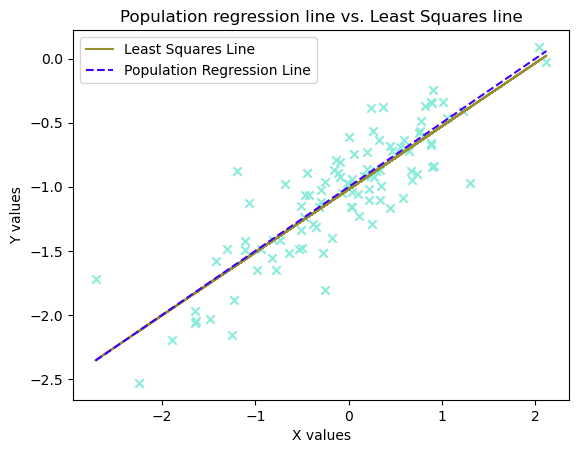

In [79]:
plt.scatter(x, y, color='#89ecda', marker='x');
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Population regression line vs. Least Squares line');
X_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = -1 + 0.5 * X_smooth 
plt.plot(x, y_hat, color='#969030', label='Least Squares Line', )
plt.plot(X_smooth, y_smooth, color='#4000ff', label='Population Regression Line', linestyle='--')
plt.legend()
plt.show();

### Exercise 3.13 g

Now fit a polynomial regression model that predicts `y` using `x` and $x^{2}$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

**Answer**:

Indicating the $p$-value to corresponding $x^2$ predictor we have a strong evidence to reject $H_a$ in favor of $H_0$. 
We can also compare the $R^{2}$ of `simple_model` and `simple_model2`:
* based on the values of $R^{2}$ we can see that adding $x^{2}$ does not improve the model fit,
* performing `ANOVA` test, we have large $p$-value which indicates that we have strong evidence to reject $H_a$ — the more complex model does not improve a fit to the data.

In [80]:
X_design = MS([poly('x', degree=2)]).fit_transform(data)
polynomial_model = sm.OLS(y, X_design).fit()

summarize(polynomial_model)

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(x, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(x, degree=2)[1]",-0.0131,0.252,-0.052,0.959


In [81]:
(simple_model.rsquared, polynomial_model.rsquared)

(0.7407603575807877, 0.7407675414652726)

In [82]:
resid = polynomial_model.resid
ssr_model2 = np.sum(np.square(resid))
df_resid_model2 = polynomial_model.df_resid

ss_diff = simple_model.ssr - ssr_model2
df_diff = simple_model.df_resid - df_resid_model2
F = (ss_diff / df_diff) / (ssr_model2 / df_resid_model2) 

p_value = 1 - f.cdf(F, df_diff, df_resid_model2)
print(p_value)

0.9587574912264232


### Exercise 3.13 h

Repeat [(a)](#Exercise-13.3-a)–[(f)](#Exercise-13.3-f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in [(b)](#Exercise-13.3-b). Describe your results.

In [83]:
eps_2 = rng.normal(0, 0.05, size=(100))

In [84]:
y_new = -1 + 0.5 * x + eps_2

### Exercise 3.13 h (d)

**Answer**:

* with a decrease of $\sigma$ from $\sigma = 0.25$ to $\sigma = 0.05$ we see very aligned data points. The correlation among these data points is very high, and there is strong pattern for linear relationship beteween $X$ and $Y$.

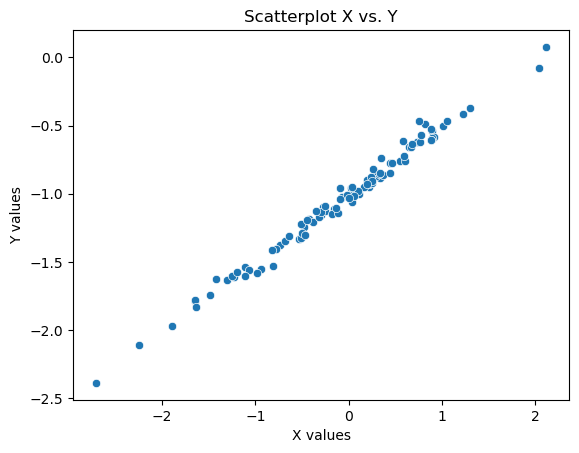

In [85]:
sns.scatterplot(x=x, y=y_new);
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatterplot X vs. Y')
plt.show();

### Exercise 3.13 f (e)

**Answer**:

* we see the standard errors are higher than in fit of earlier simple linear regression. The dispersion causes more uncertanity in estimation of $\beta$ coefficients. The difference between $\beta$ and $\hat{\beta}$ is not huge, however, the difference is notable: $\hat{\beta_0} =-1.0005	$, ${\beta_0} = -1$, $\beta_1 = 0.5$, $\hat{\beta_1} = 0.5073$

In [86]:
X_design = MS(['x']).fit_transform(data)
simple_model2 = sm.OLS(y_new, X_design).fit()

summarize(simple_model2)

,coef,std err,t,P>|t|
intercept,-1.0081,0.005,-217.791,0.0
x,0.4994,0.005,92.211,0.0


In [87]:
y_hat_new = simple_model2.get_prediction().predicted

### Exercise 3.13 f (f)

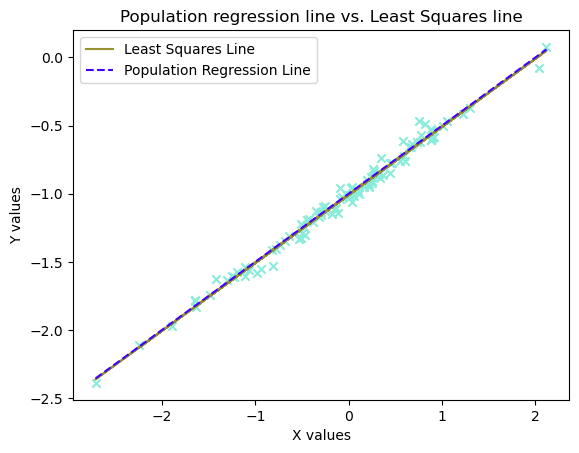

In [88]:
plt.scatter(x, y_new, color='#89ecda', marker='x');
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Population regression line vs. Least Squares line');
X_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = -1 + 0.5 * X_smooth 
plt.plot(x, y_hat_new, color='#969030', label='Least Squares Line', )
plt.plot(X_smooth, y_smooth, color='#4000ff', label='Population Regression Line', linestyle='--')
plt.legend()
plt.show();

### Exercise 13.3 f (g)

**Answer**:

* the test of `ANOVA` suggests a strong evidence that polynomial regression does not provide a statistically significat improvement over the simple linear regression $\text{p-value} = 0.776373$,
* the difference of `ssr` which stands for *Sum of Squared Residuals* equals to $0.000155$ which is not significant differnce between those models.

In [89]:
X_design = MS([poly('x', degree=2)]).fit_transform(data)
polynomial_model2 = sm.OLS(y_new, X_design).fit()

summarize(polynomial_model2)

,coef,std err,t,P>|t|
intercept,-1.0449,0.005,-225.424,0.000
"poly(x, degree=2)[0]",4.2523,0.046,91.743,0.000
"poly(x, degree=2)[1]",0.0041,0.046,0.089,0.929


In [90]:
sm.stats.anova_lm(simple_model2, polynomial_model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,0.208410,0.0,NaN,NaN,NaN
1,97.0,0.208393,1.0,0.000017,0.007955,0.929116


### Exercise 13.3 i

Repeat [(a)](#Exercise-13.3-a)–[(f)](#Exercise-13.3-f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in [(b)](#Exercise-13.3-b). Describe your results

In [91]:
eps_3 = rng.normal(0, 0.9, size=(100))

Y_3 = -1 + 0.5 * x + eps_3

### Exercise 13.3 i (d)

**Answer**:

* with a decrease of $\sigma$ from $\sigma = 0.05$ to $\sigma = 0.9$ we see much more dispersion among data points. The correlation among these data points is weak (I would say close to $0$), and there is no pattern for linear relationship beteween $X$ and $Y$.

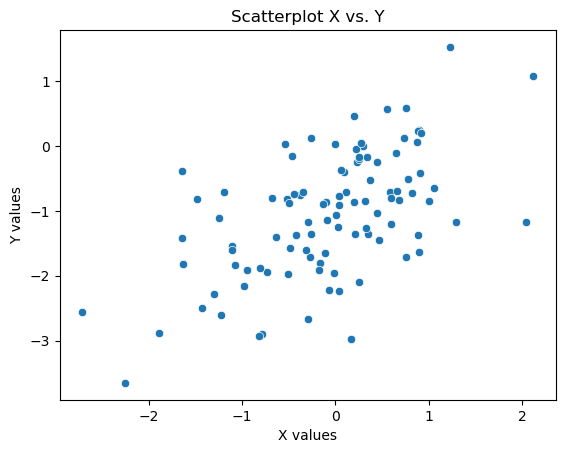

In [92]:
sns.scatterplot(x=x, y=Y_3);
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatterplot X vs. Y')
plt.show();

### Exericse 13.3 i (e)

**Answer**:
* we see that estimations of $\beta$ coefficients are very far from true $\beta$. For example we see $\hat{\beta_1} = 0.31$ whereas the true $\beta = 0.5$

In [93]:
X = MS(['x']).fit_transform(data)
simple_model3 = sm.OLS(Y_3, X).fit()

summarize(simple_model3)

,coef,std err,t,P>|t|
intercept,-1.0082,0.079,-12.810,0.0
x,0.6323,0.092,6.866,0.0


In [94]:
y_hat_high_eps = simple_model3.get_prediction().predicted

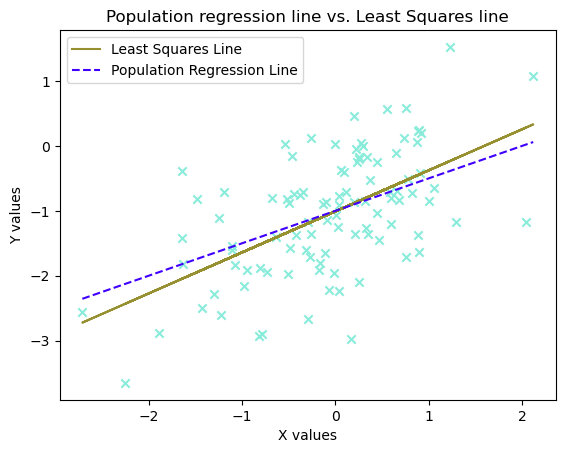

In [95]:
plt.scatter(x, Y_3, color='#89ecda', marker='x');
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Population regression line vs. Least Squares line');
X_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = -1 + 0.5 * X_smooth 
plt.plot(x, y_hat_high_eps, color='#969030', label='Least Squares Line', )
plt.plot(X_smooth, y_smooth, color='#4000ff', label='Population Regression Line', linestyle='--')
plt.legend()
plt.show();

### Exercise 3.13 i (g)

**Answer**:

* fit of polynomial regression if not siginificant better than the fit of simple linear regression model.

In [96]:
X_design = MS([poly('x', degree=2)]).fit_transform(data)
polynomial_model3 = sm.OLS(Y_3, X_design).fit()

summarize(polynomial_model3)

,coef,std err,t,P>|t|
intercept,-1.0548,0.079,-13.388,0.000
"poly(x, degree=2)[0]",5.3844,0.788,6.834,0.000
"poly(x, degree=2)[1]",-0.2244,0.788,-0.285,0.776


In [97]:
simple_model3.rsquared, polynomial_model3.rsquared

(0.324817415784762, 0.3253816909581263)

In [98]:
sm.stats.anova_lm(simple_model3, polynomial_model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,60.262694,0.0,NaN,NaN,NaN
1,97.0,60.212330,1.0,0.050364,0.081134,0.776373


### Exercise 3.13 j

What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

**Answer**:

* we clearly see if there is more dispersion among the data points, the estimation of $\beta$ coefficients is much harder because of large uncertanity of estimation of $\beta$ — we see that confidence intervals in the case of the noisier data set is much more wider than for the original dataset and less noisy data set,
* we see that if the data are very well correlated $X$ and $Y$, and relationship looks linear, the confidence intervals are much narrower (the less noisy data set).

In [99]:
# confidence interval for original dataset

simple_model.conf_int(alpha=0.05)

,0,1
Intercept,-1.068891,-0.969122
x,0.433783,0.550508


In [100]:
# confidence interval for the less noisy data set

simple_model2.conf_int(alpha=0.05)

,0,1
intercept,-1.017282,-0.998911
x,0.488614,0.510108


In [101]:
# confidence interval for the noisier data set

simple_model3.conf_int(alpha=0.05)

,0,1
intercept,-1.164440,-0.852046
x,0.449552,0.815038


#### Exercise 3.14 a

This problem focuses on the *collinearity* problem.


```python
rng = np.random.default_rng (10)
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)
```

The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

**Answer**:

We see that last line is multiple linear regression model which can be described as:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \epsilon
$$

We substitute the values and got:

$$
Y = 2 + 2 \cdot X_1 + 0.3 \cdot X_2 + \epsilon \in N(0, 1)
$$

Which $N(0,1)$ is a normal distribution with $\mu=0$ and $\sigma=1$.

The coefficients of regression are:

* $\beta_0 = 2$,
* $\beta_1 = 2$,
* $\beta_2 = 0.3$

In [102]:
rng = np.random.default_rng (10)
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

### Exercise 13.4 b

What is the correlation between `x1` and `x2`? Create a scatterplot displaying relationship between the variables.

**Answer**:

* we see a positive correlationship between `x1` and `x2`. The values of `x1` incerase as well as `x2` increases. This is an inidication of positive relationship between those data.

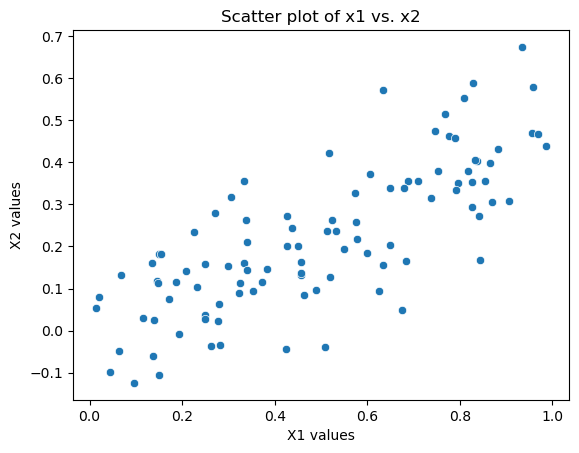

In [103]:
sns.scatterplot(x=x1, y=x2)
plt.title('Scatter plot of x1 vs. x2')
plt.xlabel('X1 values')
plt.ylabel('X2 values')
plt.show();

### Exercise 3.14 c

Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta_0}$ , $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$ , and $\beta_2$? Can you reject the null hypothesis $H_0: \beta_1 = 0$? How about the null hypothesis $H_0: \beta_2 = 0$?

**Answer**:

* $\hat{\beta_0} \approx \beta_0 = 1.9579 \approx 2$,
* $\hat{\beta_1}$ is underestimate over true $\beta_1$,
* $\hat{\beta_2}$ is overestimate over true $\beta_2$,
* in the context of $H_0: \beta_1 = 0$, we can reject $H_0$ in favor of $H_a$, because of corresponing $p$-value and $\text{t-statistic}$ which is very far from 0,
* in the context of $H_0: \beta_2 = 0$, we can accept $H_0$ in favor of $H_a$, because of corresponding $p$-value and small value of $\text{t-statistic}$ and relatively big $\text{std err}$ which is a strong evidence that in fact $X_2$ has no significance on dependent variable $Y$.

In [104]:
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X_design = MS(['x1', 'x2']).fit_transform(data)
estimator = sm.OLS(y, X_design).fit()

summarize(estimator)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


### Exercise 3.14 d

Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0: \beta_1 = 0$?

**Answer**:

* Based on the $\text{t-value}$ and corresponding $p$-value for $\beta_1$ we have a strong evidence to reject $H_0$ in favor of $H_a$.

In [105]:
X_design = MS(['x1']).fit_transform(data)
estimator_x1 = sm.OLS(y, X_design).fit()

summarize(estimator_x1)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


### Exercise 3.14 e

Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0: \beta_2 = 0$

**Answer**:

* based on the results of regressing `y` onto `x2` we got similar situation, we can not reject $H_a: \beta_2 \neq 0$, because of the value of $p$-value and $\text{t-statistic}$.

In [106]:
X_design = MS(['x2']).fit_transform(data)
estimator_x2 = sm.OLS(y, X_design).fit()

summarize(estimator_x2)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


### Exercise 3.14 f

Do the results obtained in [(c)](#Exercise-3.14-c)–[(e)](#Exercise-3.14-e) contradict each other? Explain
your answer.

**Answer**:

* I think that the results do not contradict each other. In the [(d)](#Excercise-3.14-d)-[(e)](#Exercise-3.14-e) we perform simple linear regression, so we see clearly an impact between seperate predictors vs. dependent variable. However, in [(c)](#Exercise-3.14-c) we perform linear regression with both predictors, which are highly correlated. This multicollinearity causes a narrower space of $\beta$ estimations, hence, we see an uncertanity in estimations of $\beta$, that's why for example $\hat{\beta_1}$ and corresponding $p$-value suggests to reject $H_a$ in favor of $H_0$. 

### Exercise 3.14 g

Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of `x1`, `x2` and `y`.

```python
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])
```

Re-fit the linear models from [(c)](#Exercise-3.14-c) to [(e)](#Exercise-3.14-e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

**Answer**:
* Adding last observation to `x1` and `x2` causes that the significance in the model of multiple linear regression of $\hat{\beta_1}$ is no longer valid. We see $p$-value = $0.069$ which is above $0.05$, so we can reject $H_a$ in favor of $H_0$ and hence $\hat{\beta_1} = 0$,
* we see similar situation as before, with simple linear regressions each predictor has in fact significance on the response variable $Y$, $p$-values are quite small which suggest that there is a relationship between those predictors and dependent variable $Y$,
* as a result, we see that having collinear predictors can cause significant change in $p$-values and in interpreting the model by adding some variation to the predictors,
* as we can see on the right plot, the last observation in `estimator` model can be considered as high-leverage point and as well as an outlier which is called *influential point*,
* on the middle plot we see, that last observation can be considered as an outlier and high leverage point,
* on the last plot we see that last observation can be considered as an high leverage point.

In [107]:
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

In [108]:
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X_design = MS(['x1', 'x2']).fit_transform(data)
estimator = sm.OLS(y, X_design).fit()

summarize(estimator)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [109]:
X_design_x1 = MS(['x1']).fit_transform(data)
estimator_x1 = sm.OLS(y, X_design_x1).fit()

summarize(estimator_x1)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [110]:
X_design_x2 = MS(['x2']).fit_transform(data)
estimator_x2 = sm.OLS(y, X_design_x2).fit()

summarize(estimator_x2)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


In [111]:
lo_index = x1.shape[0] - 1 # lo — last observation
lo_x1 = x1[lo_index]
lo_x2 = x2[lo_index]
lo_y = y[lo_index]

lo_x1, lo_x2, lo_y

(0.1, 0.8, 6.0)

In [112]:
p = 3
n = len(x1)
leverage_statistics = p / n

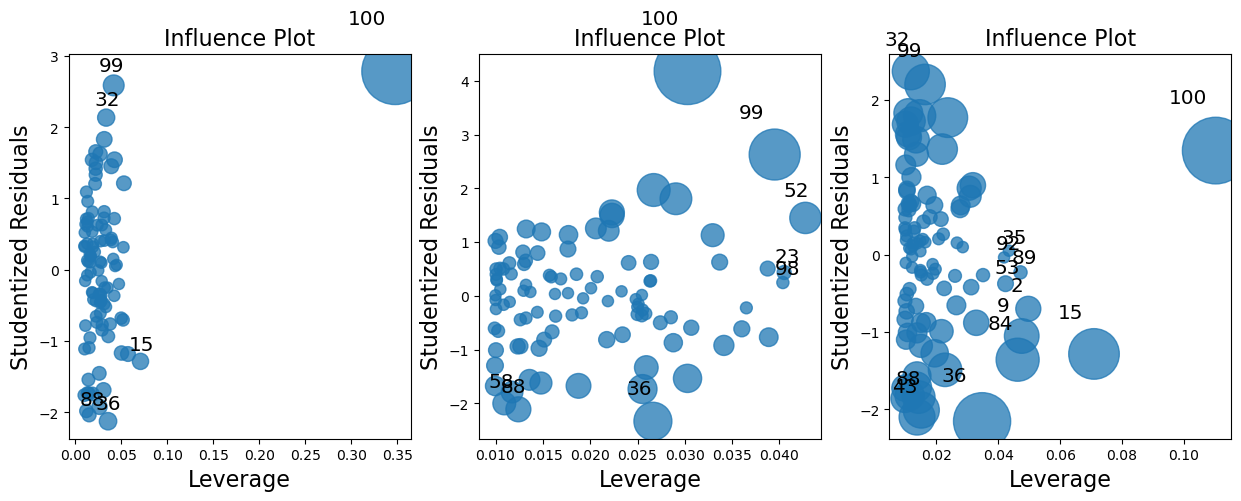

In [113]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sm.graphics.influence_plot(estimator, ax=ax[0], criterion="cooks")
sm.graphics.influence_plot(estimator_x1, ax=ax[1], criterion="cooks")
sm.graphics.influence_plot(estimator_x2, ax=ax[2], criterion="cooks")
plt.show();

### Exercise 3.15 a

This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.


For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

**Answer**:

* we see a statistical significance of `tax` between `crim` dependent variable,
* we see a statistical significance of `rad` between `crim` dependent variable,
* we see no statistical significance of `chas` between `crim` dependent variable,
* rest predictors and corresponding $p$-values indicate that there is a relationship between predictor and dependent variable $Y$,
* based on the $\text{RSS}$ and an idea behind the *forward selection* method, we see that it's worth to 

In [114]:
df = load_data('Boston')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [115]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

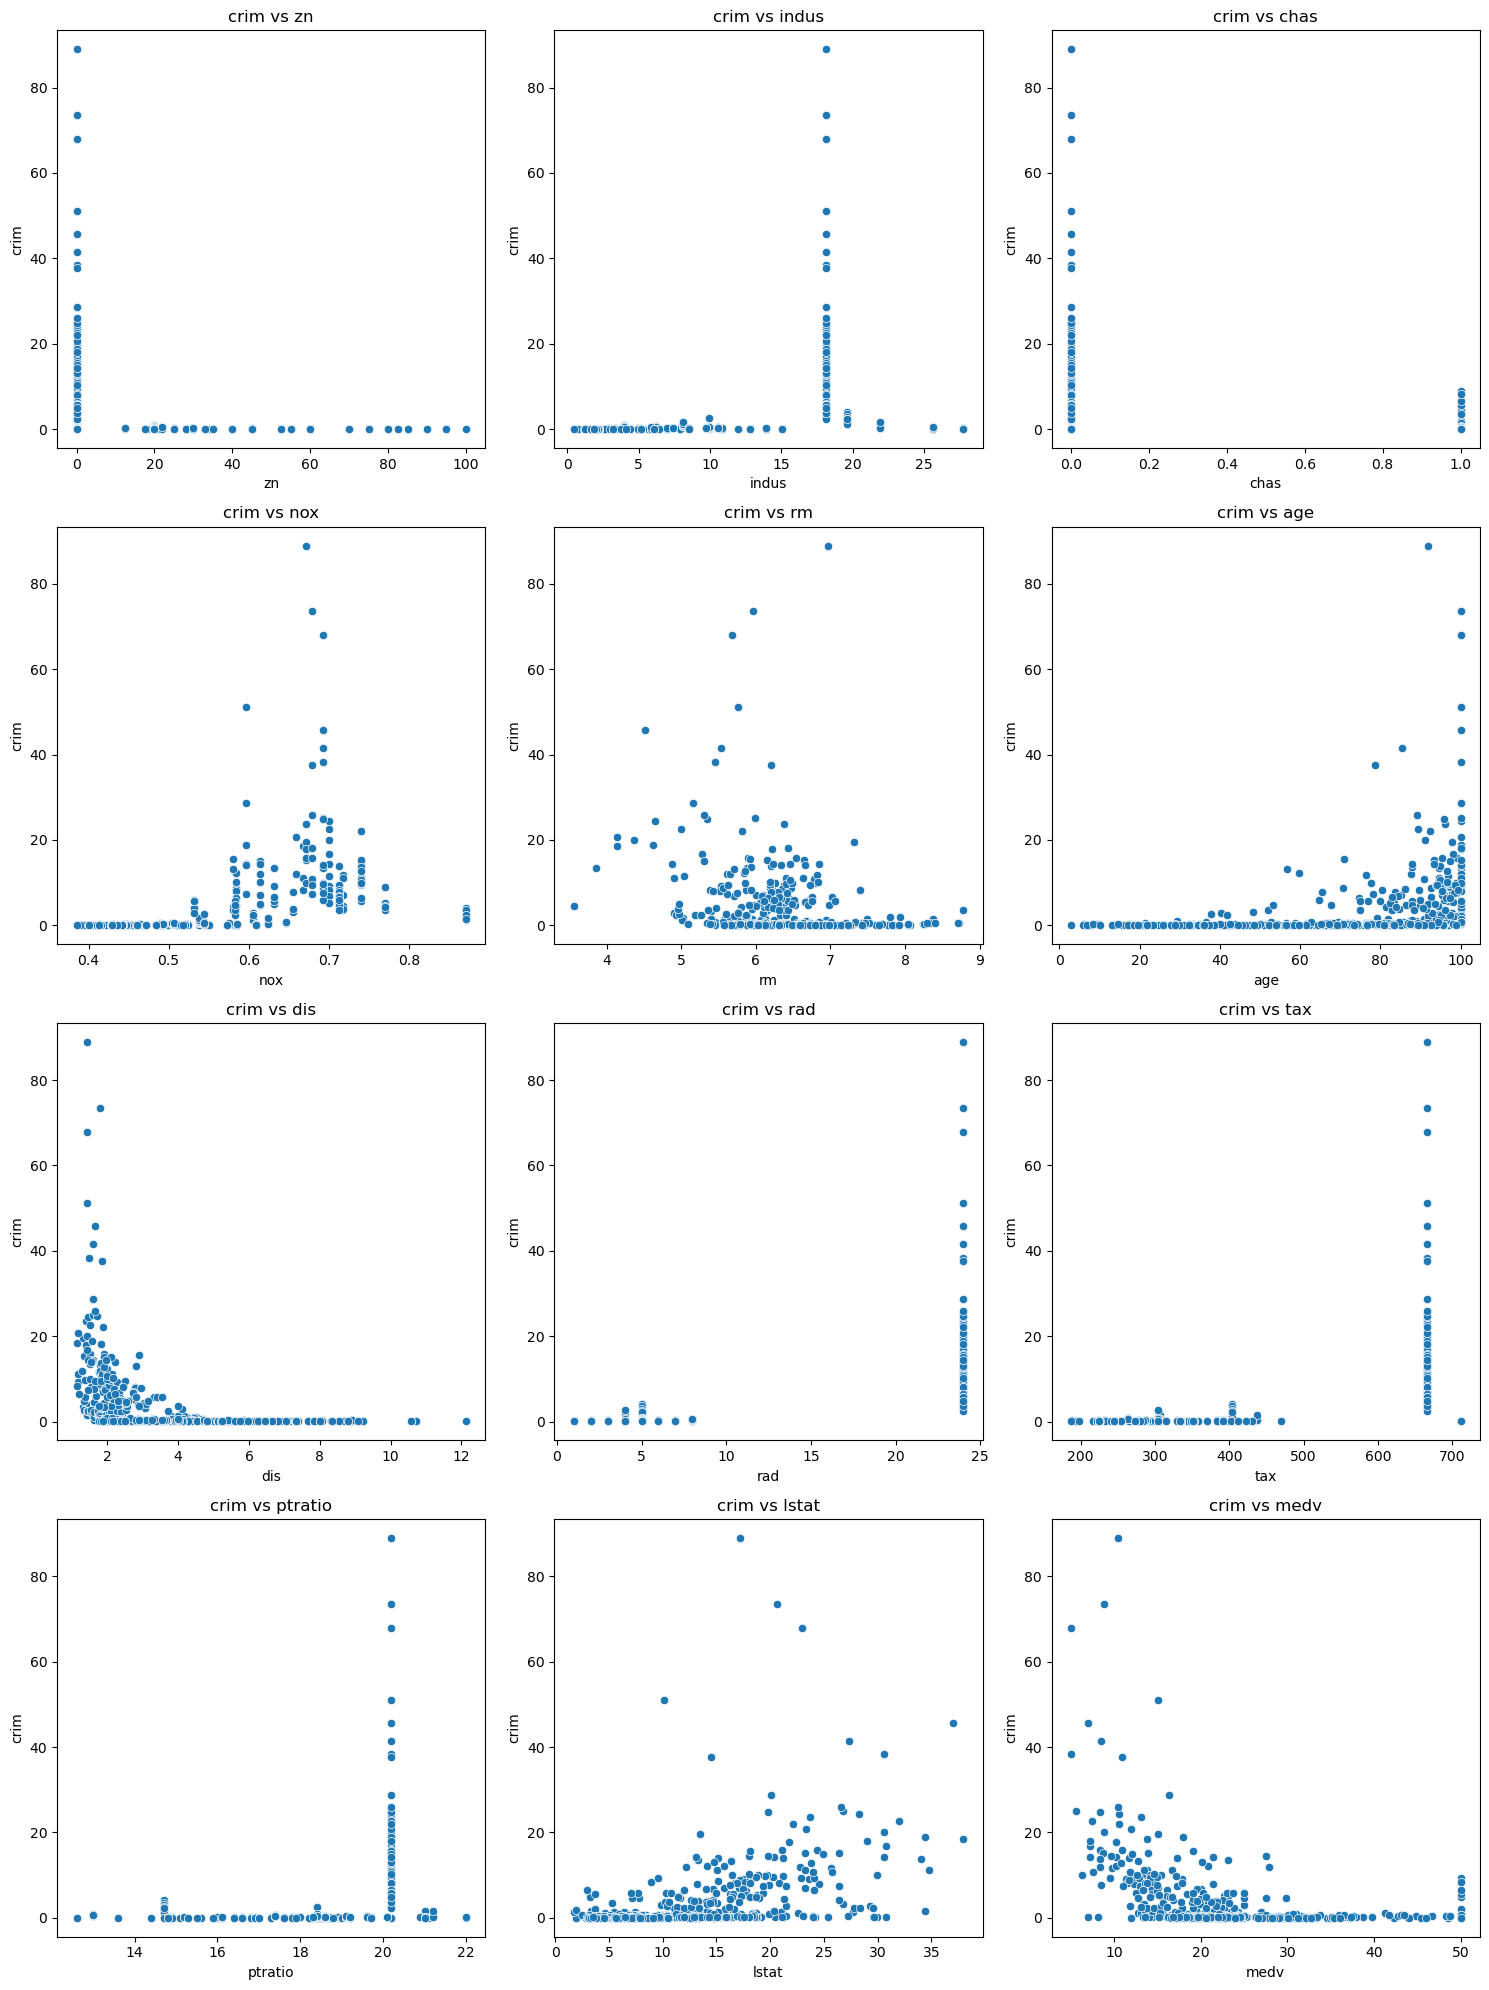

In [116]:
predictors = df.columns.drop('crim')

n_cols = 3
n_rows = len(predictors) // n_cols + (len(predictors) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

if n_rows == 1 or n_cols == 1:
    axes = axes.ravel()

for i, predictor in enumerate(predictors):
    row_idx = i // n_cols
    col_idx = i % n_cols
    sns.scatterplot(x=df[predictor], y=df['crim'], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'crim vs {predictor}')
    axes[row_idx, col_idx].set_xlabel(predictor)
    axes[row_idx, col_idx].set_ylabel('crim')

for j in range(i+1, n_rows*n_cols):
    row_idx = j // n_cols
    col_idx = j % n_cols
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show();

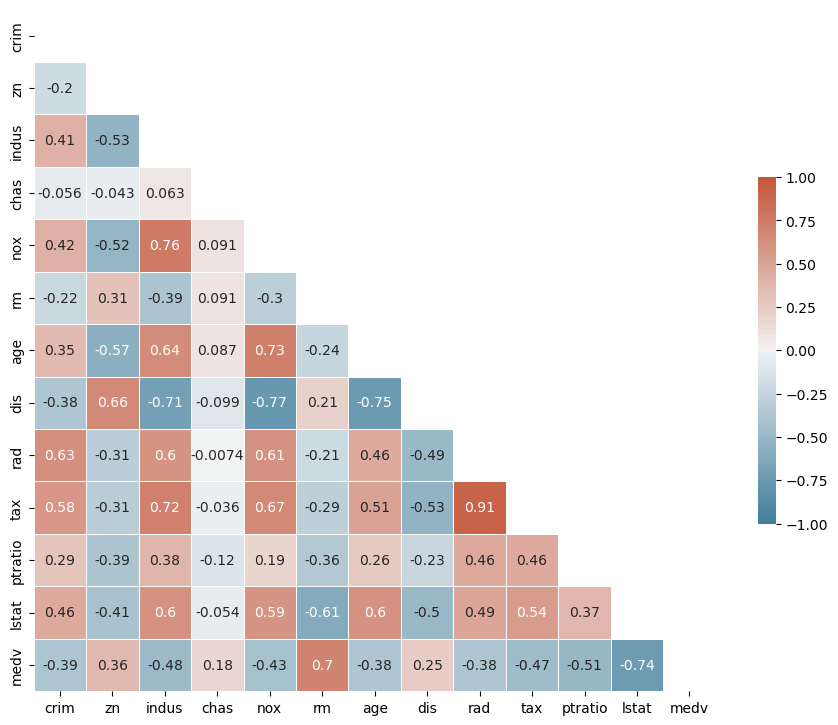

In [117]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [118]:
model_results = {}
y = df.loc[:, 'crim'].to_numpy()
for predictor in predictors:
    x = df.loc[:, predictor].to_numpy()
    X_design = sm.add_constant(x)
    estimator = sm.OLS(y, X_design).fit()
    model_results[predictor] = estimator


In [119]:
rss_models = []
for estimator in model_results.keys():
    print(f'{estimator} vs. crim')
    rss = np.sum(np.square(model_results[estimator].resid))
    print(f'RSS={rss}')
    print(model_results[estimator].summary())
    print('\n', '-' * 78, end='\n\n')
    rss_models.append(rss)

zn vs. crim
RSS=35861.67226139124
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           5.51e-06
Time:                        17:18:22   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4

In [120]:
rss_models = np.array(rss_models)
models = list(model_results.keys())
worth_models = [models[int(index)] for index in rss_models.argsort()[:4]]
print(worth_models)

rss_models[rss_models.argsort()]

['rad', 'tax', 'lstat', 'nox']


array([22744.61154821, 24674.13962402, 29606.95589503, 30741.81708667,
       31186.70513176, 31729.57785359, 31977.3368954 , 32714.43566808,
       34222.15424388, 35567.20491178, 35861.67226139, 37246.50418098])

### Exercise 3.15 b

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis $H_0: \beta_j = 0$?

**Answer**:

* using multiple linear regression with all predictors we see that $\text{p-value}$ of corresponding predictors are large:
* `indus`, `chas`, `rm`, `age`, `tax`, `ptratio` with big corresponding standard errors and relatively small $\text{t-statistics}$ give a strong evidence that those predictors are not associated with response variable $Y$. Worth to mention, that above we were doing forward selection of $p$ simple regression models, in which only `tax` appear to be related with response variable from these mentioned predictors that are not associated with $Y$,
* $\text{F-statistic}$ value is far from $0$ which gives us a strong evidence that at least one $B_j$ is related with response variable $Y$.

In [121]:
predictors = df.columns.drop('crim')
X_design = MS(predictors).fit_transform(df)
y = df.iloc[:, 0]
model = sm.OLS(y, X_design).fit()

summarize(model)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.03e-56
Time:                        17:18:22   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 13.5 c

How do your results from [(a)](#Exercise-3.15-a) compare to your results from [(b)](#Exercise-3.15-b)? Create a plot displaying the univariate regression coefficients from [(a)](#Exercise-3.15-a) on the x-axis, and the multiple regression coefficients
from [(b)](#Exercise-3.15-b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

**Answer**:

* on average, coefficient values from simple linear regression is similar to coefficients of multiple linear regression, however, we see that for `nox` predictor, simple linear fit has huge value $beta_1 \approx 31$ whereas in multiple linear regression this coefficient is approximately -10,
* we also see that 3 predictors that is (`rm`, `dis`, `chas`) are a little bit far away from this clustered coefficients, which indicates that their values are a little bit distinct from multiple and simple linear regressions.

In [123]:
betas_linear_fit = {}
for column_name, simple_model in model_results.items():
    beta_0, beta_1 = tuple(simple_model.params)
    betas_linear_fit[column_name] = {'simple_regression': [beta_1], 'multiple_regression': [model.params.get(column_name)]}

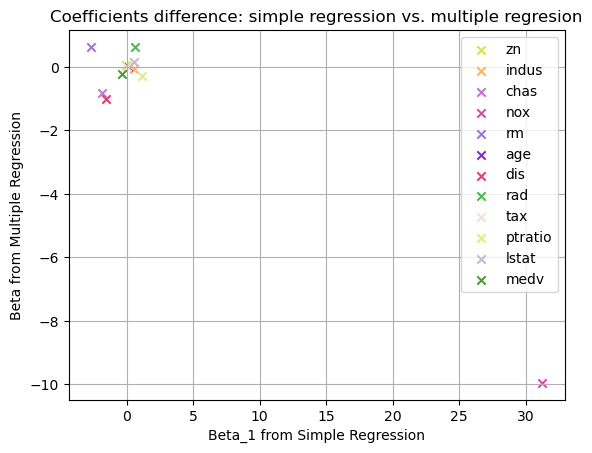

In [124]:
plt.title('Coefficients difference: simple regression vs. multiple regresion')
for predictor, betas in betas_linear_fit.items():
    simple_linear_regression_beta_1 = betas['simple_regression']
    multiple_linear_regression_beta = betas['multiple_regression']
    hex_color = hex(random.randrange(0, 2**24))
    hex_color = "#" + hex_color[2:]
    plt.scatter(simple_linear_regression_beta_1, multiple_linear_regression_beta, label=predictor, marker='x', color=hex_color)
    
plt.xlabel('Beta_1 from Simple Regression')
plt.ylabel('Beta from Multiple Regression')
plt.legend()
plt.grid(True)
plt.show();

### Exercise 3.15 d

Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form:

$$
Y = \beta_0 + \beta_1X + \beta_2X^{2} + \beta_3X^{3} + \epsilon
$$

**Answer**:

* the cubic term is associated with `indus` which respectively all $p$-values are below 0.05 threshold,
* `chas` has the quadratic term significant, cubic is above $p$-value,
* `nox` is also significant when we include cubic term of such predictor,
* `rm` quadartic term is significant, cubic is not significant,
* `medv` predictor with corresponding cubic term is also significant,
* `dis` predictor with corresponding cubic term is also significant.

In [125]:
predictors = df.columns.drop('crim')
polynomial_models = {}
for predictor in predictors:
    cubic_term = poly(predictor, degree=3)
    X_design = MS([cubic_term]).fit_transform(df)
    polynomial_model = sm.OLS(y, X_design).fit()
    polynomial_models[predictor] = polynomial_model

In [126]:
for predictor, model in polynomial_models.items():
    print('-' * (75 // 2), predictor, '-' * (75 // 2))
    print(model.summary())
    print('-' * 75)
          

------------------------------------- zn -------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.28e-06
Time:                        17:18:23   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

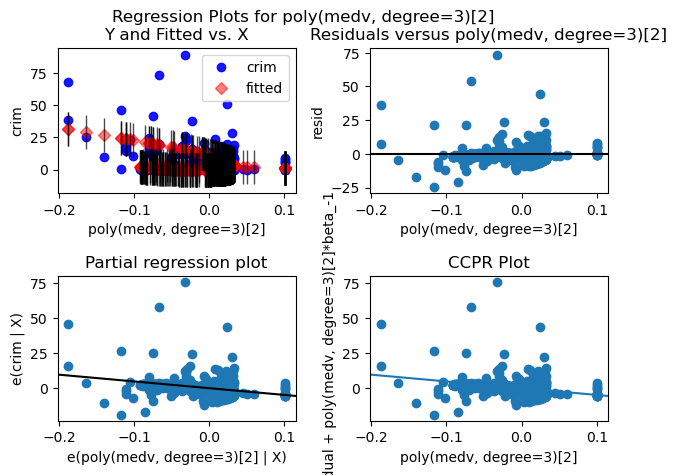

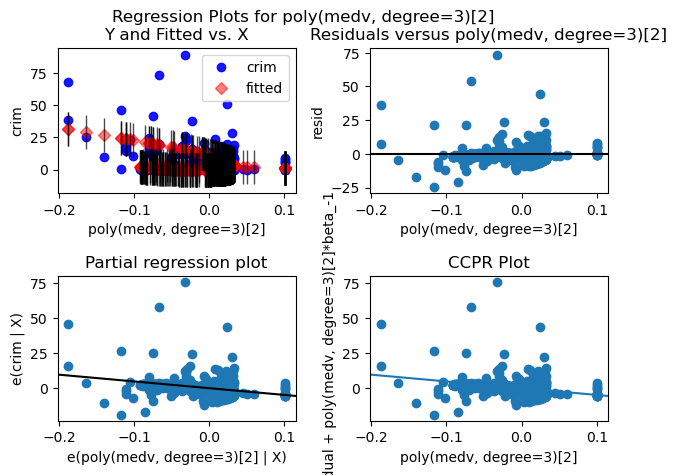

In [127]:
sm.graphics.plot_regress_exog(polynomial_models.get('medv'), -1)

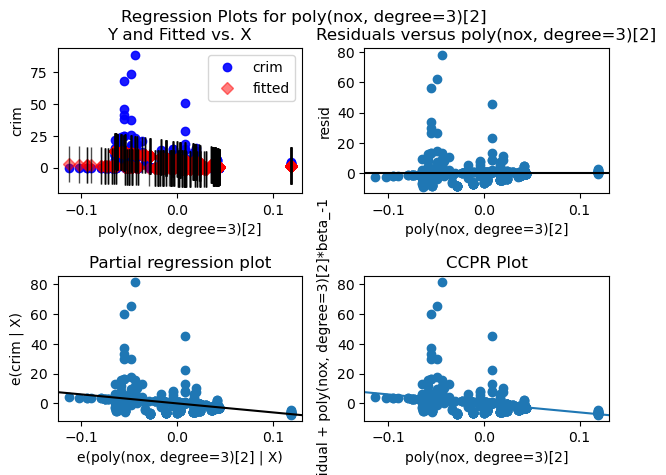

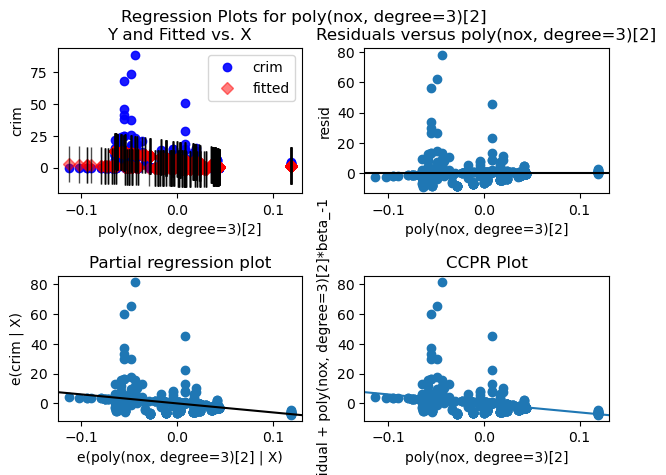

In [128]:
sm.graphics.plot_regress_exog(polynomial_models.get('nox'), -1)